## 1. Pandas 소개 및 전체 로드맵

### 개념

- **Pandas란?**: Pandas는 레이블이 있는 1D(Series) 및 2D(DataFrame) 데이터를 처리하기 위한 파이썬의 핵심 라이브러리입니다.
- **NumPy 기반**: NumPy 위에서 동작하며, 정렬, 결합, 그룹화, 시계열 처리 등 고수준의 테이블 연산을 지원합니다.
- **분석 워크플로우**: `입력 → 정제 → 변환 → 집계 → 리포트/시각화`로 이어지는 일관된 API를 통해 데이터 분석의 전 과정을 수행합니다.

### 핵심 내용

- **핵심 객체**: `Series`, `DataFrame`, `Index`가 Pandas의 3대 핵심 데이터 구조입니다.
- **기본 점검**: 데이터를 불러온 후에는 `shape`, `dtypes`, `head()`, `info()`, `describe()`와 같은 메서드를 사용하여 데이터의 기본적인 정보를 확인하는 것이 중요합니다.
- **실습 환경**: Jupyter Notebook이나 VSCode 환경에서 샘플 CSV 파일을 사용하여 실습하는 것을 권장합니다. (이때, 파일의 인코딩과 구분자 설정에 주의해야 합니다.)

### 코드 예제



In [1]:
# Pandas 라이브러리를 pd라는 별칭으로 불러옵니다.
import pandas as pd

# 간단한 DataFrame 샘플을 생성합니다.
# DataFrame은 딕셔너리 형태로 만들 수 있으며, 각 key는 컬럼 이름이 됩니다.
df = pd.DataFrame({
    'city': ['Seoul', 'Busan', 'Incheon'],  # 도시 이름 컬럼
    'pop': [9776, 3452, 2943],             # 인구 수 컬럼
    'is_capital': [True, False, False]    # 수도 여부 컬럼
})

# df.head()는 DataFrame의 처음 5개 행을 출력하여 데이터의 구조를 빠르게 파악할 수 있게 합니다.
print("--- DataFrame의 첫 5행 ---")
print(df.head())

# df.info()는 DataFrame의 전체적인 정보를 요약해서 보여줍니다.
# 각 컬럼의 데이터 타입, null이 아닌 값의 개수, 메모리 사용량 등을 확인할 수 있습니다.
print("\n--- DataFrame 정보 요약 ---")
print(df.info())

--- DataFrame의 첫 5행 ---
      city   pop  is_capital
0    Seoul  9776        True
1    Busan  3452       False
2  Incheon  2943       False

--- DataFrame 정보 요약 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   city        3 non-null      object
 1   pop         3 non-null      int64 
 2   is_capital  3 non-null      bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 183.0+ bytes
None




---

## 2. Series 핵심 (스칼라 <-> 1D)

### 개념

- **Series란?**: 값(value) 배열과 인덱스(index) 레이블의 조합으로 이루어진 1차원 데이터 구조입니다.
- **자동 정렬**: 벡터 연산 시 인덱스를 기준으로 자동으로 정렬됩니다.
- **생성**: 리스트, ndarray, 딕셔너리 등 다양한 데이터 타입으로 생성할 수 있으며, `name` 속성으로 의미 있는 컬럼명을 부여할 수 있습니다.
- **dtype**: 데이터 타입(dtype)은 계산 성능과 메모리 사용량에 영향을 주므로, `astype`을 사용하여 명시적으로 변환하는 것이 좋습니다.

### 핵심 내용

- **원소 선택**:
    - `.loc`: 레이블(인덱스 이름) 기반으로 원소를 선택합니다.
    - `.iloc`: 위치(정수 인덱스) 기반으로 원소를 선택합니다.
- **벡터 연산 및 누락값 처리**: `+`, `*`, `np.log`와 같은 수학 연산을 모든 원소에 한 번에 적용할 수 있으며, `isna()`, `fillna()`를 통해 누락값을 일괄적으로 처리합니다.
- **정렬/순위**: `sort_values()`로 값을 정렬하고, `rank()`로 순위를 매길 수 있어 보고서용 지표 생성에 유용합니다.

### 코드 예제



In [2]:
import pandas as pd
import numpy as np

# Series를 생성합니다. 값과 인덱스를 직접 지정하고, 'score'라는 이름을 부여합니다.
s = pd.Series([3, 1, None, 4], index=['a', 'b', 'c', 'd'], name='score')

# s.isna()는 각 원소가 결측치인지 여부를 boolean 값으로 반환합니다.
# .sum()을 통해 결측치의 총 개수를 계산합니다. (True=1, False=0)
print(f"결측치 개수: {s.isna().sum()}")

# s.fillna(0)은 결측치(None)를 0으로 채웁니다.
# .astype('float32')는 Series의 데이터 타입을 float32로 변환하여 메모리 효율을 높입니다.
print("\n--- 결측치 처리 및 타입 변환 ---")
print(s.fillna(0).astype('float32'))

# s.sort_values()는 값을 기준으로 Series를 오름차순으로 정렬합니다.
print("\n--- 값 기준 정렬 ---")
print(s.sort_values())

결측치 개수: 1

--- 결측치 처리 및 타입 변환 ---
a    3.0
b    1.0
c    0.0
d    4.0
Name: score, dtype: float32

--- 값 기준 정렬 ---
b    1.0
a    3.0
d    4.0
c    NaN
Name: score, dtype: float64




---

## 3. DataFrame 핵심 (2D 테이블)

### 개념

- **DataFrame이란?**: 여러 개의 Series가 같은 인덱스를 공유하며 모여있는 2차원 테이블 형태의 데이터 구조입니다.
- **정합/결합**: 행과 열의 레이블을 기준으로 데이터 정합 및 결합이 용이합니다.
- **생성**: 딕셔너리, 리스트, 배열, CSV 파일 등 다양한 소스로부터 생성할 수 있으며, `columns`와 `index` 파라미터로 레이블을 직접 지정할 수 있습니다.
- **빠른 파악**: `head()`, `info()`, `describe()` 메서드와 값의 분포(`value_counts()`), 유니크한 값(`unique()`) 등을 확인하여 데이터를 빠르게 파악합니다.

### 핵심 내용

- **선택**:
    - `df['col']`: 단일 컬럼 선택 (Series 반환)
    - `df[['c1', 'c2']]`: 여러 컬럼 선택 (DataFrame 반환)
    - `.loc` / `.iloc`: 특정 행/열을 레이블 또는 위치로 선택
- **타입**: `df.dtypes`로 각 컬럼의 타입을 점검하고, 불필요하게 `object` 타입으로 지정된 컬럼은 메모리 및 성능을 위해 적절한 타입으로 다운캐스팅하는 것이 좋습니다.
- **기본 통계**: `mean()`, `std()`, `value_counts()` 등의 메서드를 사용하여 데이터의 품질과 이상치를 감지합니다.

### 코드 예제



In [3]:
import pandas as pd

# 딕셔너리를 사용하여 DataFrame을 생성합니다.
raw = {
    'age': [23, 31, 27, 35],
    'city': ['Seoul', 'Busan', 'Seoul', 'Incheon'],
    'score': [88.5, 91.2, 83.0, 95.0]
}
df = pd.DataFrame(raw)

# 'age'와 'score' 두 컬럼을 선택하여 평균을 계산합니다.
# DataFrame에서 여러 컬럼을 선택할 때는 리스트 형태로 컬럼명을 전달합니다.
print("--- 'age'와 'score' 컬럼의 평균 ---")
print(df[['age', 'score']].mean())

# 'city' 컬럼의 각 값들이 몇 번씩 나타나는지 빈도를 계산합니다.
print("\n--- 'city' 컬럼의 값 빈도 ---")
print(df.value_counts('city'))

# describe(include='all')은 모든 컬럼(숫자형, 문자열 등)에 대한 기술 통계량을 보여줍니다.
# count(개수), unique(고유값 수), top(최빈값), freq(최빈값 빈도), mean(평균), std(표준편차) 등을 확인할 수 있습니다.
print("\n--- 모든 컬럼에 대한 기술 통계 ---")
print(df.describe(include='all'))

--- 'age'와 'score' 컬럼의 평균 ---
age      29.000
score    89.425
dtype: float64

--- 'city' 컬럼의 값 빈도 ---
city
Seoul      2
Busan      1
Incheon    1
Name: count, dtype: int64

--- 모든 컬럼에 대한 기술 통계 ---
              age   city      score
count    4.000000      4   4.000000
unique        NaN      3        NaN
top           NaN  Seoul        NaN
freq          NaN      2        NaN
mean    29.000000    NaN  89.425000
std      5.163978    NaN   5.045377
min     23.000000    NaN  83.000000
25%     26.000000    NaN  87.125000
50%     29.000000    NaN  89.850000
75%     32.000000    NaN  92.150000
max     35.000000    NaN  95.000000




---

## 4. Index / 레이블 정렬의 원리

### 개념

- **Index의 역할**: 행과 열의 '정체성'을 나타냅니다. Pandas의 모든 연산은 이 레이블을 기준으로 정렬되고 정합(align)됩니다.
- **인덱스 관리**: `set_index`, `reset_index`, `reindex`, `rename` 등의 메서드를 사용하여 인덱스를 관리합니다.
- **정합 실패**: 두 객체 간의 연산에서 인덱스가 맞지 않으면, 해당 위치는 누락값(NaN)으로 처리됩니다. 따라서 연산 전 키/정렬 상태를 먼저 점검해야 합니다.

### 핵심 내용

- **조인 전 확인**: 조인(Join) 연산을 수행하기 전, 양쪽 데이터의 인덱스를 정규화하고(예: 공백 제거, 대소문자 통일) 타입을 일치시키는(예: str ↔ int) 과정이 중요합니다.
- **재색인(reindex)**: `reindex`를 사용하면 기준이 되는 인덱스 틀에 맞게 데이터를 재배열할 수 있으며, `fill_value` 옵션으로 새로 생기는 공간의 누락값을 특정 값으로 채울 수 있습니다.
- **축 이름/단위 문서화**: `rename` 또는 `rename_axis`를 사용하여 축의 이름이나 단위를 명확하게 문서화하면 코드의 가독성이 높아집니다.

### 코드 예제



In [4]:
import pandas as pd

# Series를 생성합니다. 값과 인덱스를 직접 지정하고, 'score'라는 이름을 부여합니다.
s = pd.Series([3, 1, None, 4], index=['a', 'b', 'c', 'd'], name='score')

# s.isna()는 각 원소가 결측치인지 여부를 boolean 값으로 반환합니다.
# .sum()을 통해 결측치의 총 개수를 계산합니다. (True=1, False=0)
print(f"결측치 개수: {s.isna().sum()}")

# s.fillna(0)은 결측치(None)를 0으로 채웁니다.
# .astype('float32')는 Series의 데이터 타입을 float32로 변환하여 메모리 효율을 높입니다.
print("\n--- 결측치 처리 및 타입 변환 ---")
print(s.fillna(0).astype('float32'))

# s.sort_values()는 값을 기준으로 Series를 오름차순으로 정렬합니다.
print("\n--- 값 기준 정렬 ---")
print(s.sort_values())

결측치 개수: 1

--- 결측치 처리 및 타입 변환 ---
a    3.0
b    1.0
c    0.0
d    4.0
Name: score, dtype: float32

--- 값 기준 정렬 ---
b    1.0
a    3.0
d    4.0
c    NaN
Name: score, dtype: float64




---

## 5. 데이터 I/O 빠른 맛보기

### 개념

- **입력 포맷**: CSV, Excel, JSON, Parquet 등 다양한 데이터 포맷을 지원하며, 분석 목적에 맞는 포맷을 선택하는 것이 중요합니다.
- **CSV 주의사항**: CSV는 보편적이지만, 데이터를 읽을 때 타입, 인코딩, 구분자 등을 정확히 설정해야 오류를 방지할 수 있습니다.
- **대용량 데이터 처리**: 대용량 파일은 `chunksize` 옵션으로 파일을 여러 조각으로 나누어 처리하거나, `usecols` 옵션으로 필요한 컬럼만 선택하여 메모리 사용량을 줄일 수 있습니다.

### 핵심 내용

- **`read_csv`**: 파일을 읽는 단계에서 `dtype`으로 데이터 타입을 명시하고, `parse_dates`로 날짜 컬럼을 지정하면 후처리 비용을 줄일 수 있습니다.
- **`to_csv`**: `index=False` 옵션을 사용하여 DataFrame의 인덱스가 파일에 불필요하게 저장되는 것을 방지할 수 있습니다.
- **Parquet/Feather**: 이진(binary) 포맷으로, 속도와 용량 효율성이 뛰어나 중간 산출물을 저장하기에 적합합니다.

### 코드 예제



In [5]:
import pandas as pd

# CSV 파일을 읽는 예제 (실제 파일이 없으므로 주석 처리)
# df = pd.read_csv(
#     'data.csv',
#     usecols=['id', 'dt', 'y'],  # 'id', 'dt', 'y' 컬럼만 선택적으로 읽어옴
#     dtype={'id': 'int32', 'y': 'float32'},  # 각 컬럼의 데이터 타입을 지정하여 메모리 최적화
#     parse_dates=['dt']  # 'dt' 컬럼을 날짜 타입으로 파싱
# )

# 저장을 위한 예시 DataFrame 생성
mini = pd.DataFrame({'id': [1, 2], 'y': [3.14, 2.72]})

# mini DataFrame을 'mini.csv' 파일로 저장합니다.
# index=False 옵션으로 DataFrame의 인덱스는 저장하지 않습니다.
mini.to_csv('mini.csv', index=False)

# 저장된 'mini.csv' 파일을 다시 읽어와서 데이터 타입을 확인합니다.
# dtypes 속성은 각 컬럼의 데이터 타입을 보여줍니다.
print("--- 저장 후 읽어온 CSV의 데이터 타입 ---")
print(pd.read_csv('mini.csv').dtypes)

--- 저장 후 읽어온 CSV의 데이터 타입 ---
id      int64
y     float64
dtype: object




---

## 6. 선택 기초 - [] / .loc / .iloc

### 개념

- **명확한 구분**: 레이블 기반 인덱싱(`.loc`)과 위치 기반 인덱싱(`.iloc`)을 명확히 구분하여 사용해야 합니다.
- **`[]`의 기본 용도**: 대괄호 `[]`는 기본적으로 열(column)을 선택하는 데 사용됩니다. 단일 또는 복수 개의 열을 선택할 수 있으며, 행 선택에는 직접적으로 사용하지 않는 것이 좋습니다.
- **슬라이싱 규칙**:
    - `.loc` 슬라이싱: 끝점을 **포함**합니다. (예: `df.loc['a':'c']`는 'a', 'b', 'c' 행을 모두 포함)
    - `.iloc` 슬라이싱: 끝점을 **제외**합니다. (예: `df.iloc[0:2]`는 0, 1번 행을 포함)

### 핵심 내용

- **조건 필터링**: Boolean 마스크(mask)를 사용하여 조건에 맞는 행을 필터링할 수 있습니다. 이 때, 마스크의 길이는 원본 DataFrame의 행 길이와 반드시 같아야 합니다.
- **안전한 데이터 대입**: 체인 인덱싱(예: `df['col'][mask] = value`)은 예기치 않은 동작을 유발할 수 있으므로, `.loc[row_mask, col]` 형태를 사용하여 안전하게 값을 대입하는 것이 좋습니다.
- **혼용 주의**: 정렬이나 재색인 후에는 DataFrame의 레이블과 위치가 변경될 수 있으므로, `.loc`과 `.iloc`을 혼용할 때 특히 주의해야 합니다.

### 코드 예제



In [6]:
import pandas as pd

# 예제 DataFrame 생성
df = pd.DataFrame({
    'age': [23, 31, 27, 35],
    'city': ['Seoul', 'Busan', 'Seoul', 'Incheon'],
    'score': [88.5, 91.2, 83.0, 95.0]
}, index=['a', 'b', 'c', 'd'])

# .loc를 사용하여 'b'부터 'd'까지의 행과 'age', 'city' 컬럼을 선택합니다.
print("--- .loc 슬라이싱 예제 ---")
print(df.loc['b':'d', ['age', 'city']])

# .iloc를 사용하여 1번부터 2번 행(3번 미포함)과 0번부터 1번 컬럼(2번 미포함)을 선택합니다.
print("\n--- .iloc 슬라이싱 예제 ---")
print(df.iloc[1:3, 0:2])

# 복합 조건을 사용한 마스크 생성
# 조건 1: city가 'Seoul'
# 조건 2: age가 25 이상
mask = (df['city'] == 'Seoul') & (df['age'] >= 25)

# 생성된 마스크를 .loc에 적용하여 조건에 맞는 행의 'age'와 'score' 컬럼을 선택합니다.
print("\n--- 조건 필터링 예제 ---")
print(df.loc[mask, ['age', 'score']])

--- .loc 슬라이싱 예제 ---
   age     city
b   31    Busan
c   27    Seoul
d   35  Incheon

--- .iloc 슬라이싱 예제 ---
   age   city
b   31  Busan
c   27  Seoul

--- 조건 필터링 예제 ---
   age  score
c   27   83.0




---

## 7. 고급 선택 - at/iat, 다중조건, isin/between

### 개념

- **단일 원소 접근**:
    - `.at`: 레이블 기반으로 단일 값에 가장 빠르게 접근합니다.
    - `.iat`: 위치 기반으로 단일 값에 가장 빠르게 접근합니다.
- **다중 조건 결합**: 여러 조건을 결합할 때는 `&`(AND), `|`(OR), `~`(NOT) 연산자를 사용하며, 각 조건은 반드시 괄호 `()`로 묶어야 합니다.
- **간결한 필터링**:
    - `isin()`: 특정 값 목록에 포함되는지 여부를 확인하여 멤버십 필터링을 수행합니다.
    - `between()`: 값이 특정 범위 사이에 있는지 확인하여 구간 필터링을 수행합니다.

### 핵심 내용

- **가독성**: 카테고리나 문자열 컬럼의 멤버십을 확인할 때는 `isin()`을 사용하는 것이 가독성이 가장 좋습니다.
- **성능**: 단일 셀의 값을 읽고 쓰는 작업이 빈번하여 성능이 중요한 경우, `.at`이나 `.iat`를 사용하는 것이 효율적입니다.
- **결측치 포함 조건**: 결측치(`NaN`)를 포함하는 조건을 다룰 때는 `isna()`와 다른 조건을 `|` 연산자로 결합하여 명시적으로 처리해야 합니다.

### 코드 예제



In [7]:
import pandas as pd

# 예제 데이터 (이전 셀의 df 사용)
df = pd.DataFrame({
    'age': [23, 31, 27, 35],
    'city': ['Seoul', 'Busan', 'Seoul', 'Incheon'],
    'score': [88.5, 91.2, 83.0, 95.0]
}, index=['a', 'b', 'c', 'd'])

# isin과 between을 사용한 다중 조건 필터링
cities = ['Seoul', 'Busan']
# 조건 1: age가 20과 30 사이
# 조건 2: city가 'Seoul' 또는 'Busan'
mask = df['age'].between(20, 30) & df['city'].isin(cities)
print("--- isin/between 필터링 예제 ---")
print(df.loc[mask])

# .at을 사용하여 'a'행 'score'열의 값을 레이블로 접근하여 가져옵니다.
val = df.at['a', 'score']
print(f"\n.at['a', 'score'] 값: {val}")

# .iat를 사용하여 0행 2열의 값을 위치로 접근하여 가져옵니다.
idx_val = df.iat[0, 2]
print(f".iat[0, 2] 값: {idx_val}")

# .at을 사용하여 'a'행 'score'열의 값을 1.5 증가시킵니다.
df.at['a', 'score'] = val + 1.5
print("\n--- .at으로 값 수정 후 ---")
print(df.loc['a'])

--- isin/between 필터링 예제 ---
   age   city  score
a   23  Seoul   88.5
c   27  Seoul   83.0

.at['a', 'score'] 값: 88.5
.iat[0, 2] 값: 88.5

--- .at으로 값 수정 후 ---
age         23
city     Seoul
score     90.0
Name: a, dtype: object




---

## 8. 선언형 필터 - query / eval

### 개념

- **`query()`**: 문자열 표현식을 사용하여 행을 필터링하는 선언적인 방법을 제공합니다.
- **`eval()`**: 문자열 표현식을 사용하여 새로운 열을 계산하거나 파생 변수를 생성합니다.
- **변수 참조**:
    - 외부 변수: `@` 기호를 사용하여 참조합니다. (예: `@threshold`)
    - 공백/특수문자 포함 컬럼: 백틱(`` ` ``)으로 감싸서 참조합니다. (예: `` `column name` ``)

### 핵심 내용

- **가독성 및 재현성**: 복잡한 괄호와 연산자로 이루어진 필터링보다 `query`를 사용하면 코드가 더 명료해지고 재현성이 향상됩니다.
- **성능**: `query`와 `eval`의 성능은 데이터 크기와 내부적으로 사용되는 엔진(numexpr 또는 python)에 따라 달라질 수 있습니다. 일반적으로 가독성을 우선하는 것이 좋습니다.
- **반환값**: `query`와 `eval`은 새로운 객체를 반환하므로, 결과를 유지하려면 명시적으로 변수에 할당해야 합니다. (`inplace=False`가 기본값)

### 코드 예제



In [8]:
import pandas as pd

# 예제 데이터 (이전 셀의 df 사용)
df = pd.DataFrame({
    'age': [23, 31, 27, 35],
    'city': ['Seoul', 'Busan', 'Seoul', 'Incheon'],
    'score': [88.5, 91.2, 83.0, 95.0]
}, index=['a', 'b', 'c', 'd'])

# 외부 변수 설정
thr = 85

# query를 사용하여 'score'가 @thr 이상이고 'city'가 'Busan'이 아닌 행을 필터링합니다.
sub = df.query('score >= @thr and city != "Busan"')
print("--- query 필터링 결과 ---")
print(sub[['city', 'score']])

# eval을 사용하여 'z-score'와 유사한 파생 변수 'z'를 생성합니다.
# (score - score의 평균) / score의 표준편차
feat = df.eval('z = (score - score.mean()) / score.std()', inplace=False)
print("\n--- eval 파생 변수 생성 결과 ---")
print(feat.head())

--- query 필터링 결과 ---
      city  score
a    Seoul   88.5
d  Incheon   95.0

--- eval 파생 변수 생성 결과 ---
   age     city  score         z
a   23    Seoul   88.5 -0.183336
b   31    Busan   91.2  0.351807
c   27    Seoul   83.0 -1.273443
d   35  Incheon   95.0  1.104972




---

## 9. 결측치 처리 - isna / fillna / dropna

### 개념

- **탐지**: `isna()` 또는 `notna()`를 사용하여 결측치를 탐지하고, `mean()`이나 분포(`value_counts()`)를 통해 결측치의 비율과 패턴을 먼저 파악합니다.
- **치환 (`fillna`)**:
    - 단일 값으로 채우기: `fillna(0)`
    - 이전/이후 값으로 채우기: `fillna(method='ffill')` / `fillna(method='bfill')`
    - 컬럼별 다른 값으로 채우기: `fillna({'col1': 0, 'col2': 'N/A'})`
- **제거 (`dropna`)**: `axis` 옵션에 따라 행 또는 열을 기준으로 결측치가 포함된 데이터를 제거합니다. 분석 목적과 데이터 손실률을 신중히 고려하여 사용해야 합니다.

### 핵심 내용

- **그룹별 치환**: `groupby().transform()`과 `fillna()`를 결합하면 그룹별 평균, 중앙값 등 특정 통계량으로 결측치를 채울 수 있습니다.
- **다양한 전략 적용**: 날짜, 범주, 수치 등 데이터 타입에 따라 각기 다른 결측치 처리 전략을 적용하고, 어떤 처리를 했는지 로그 기록을 남기는 것이 좋습니다.
- **검증**: 결측치를 치환한 후에는 기술 통계량(평균, 표준편차 등)이 얼마나 변했는지 재계산하여 치환의 영향을 검증해야 합니다.

### 코드 예제



In [9]:
import pandas as pd
import numpy as np

# 예제 데이터 (이전 셀의 df 사용)
df = pd.DataFrame({
    'age': [23, 31, 27, 35],
    'city': ['Seoul', 'Busan', 'Seoul', 'Incheon'],
    'score': [88.5, 91.2, 83.0, 95.0]
}, index=['a', 'b', 'c', 'd'])

# 결측치 생성을 위해 원본 DataFrame 복사
nan_df = df.copy()
# 'b'행 'score'열에 결측치(np.nan) 삽입
nan_df.loc['b', 'score'] = np.nan

# 각 컬럼별 결측치 비율을 계산합니다.
print("--- 컬럼별 결측치 비율 ---")
print(nan_df.isna().mean())

# 'city' 그룹별 'score'의 평균을 계산하여 결측치를 채웁니다.
# transform('mean')은 각 행에 해당하는 그룹의 평균값을 반환합니다.
mu = nan_df.groupby('city')['score'].transform('mean')
nan_df['score_filled'] = nan_df['score'].fillna(mu)

# 'score' 컬럼에 결측치가 있는 행을 제거하고, 남은 행의 개수를 확인합니다.
print(f"\n'score' 결측치 제거 후 shape: {nan_df.dropna(subset=['score']).shape}")

# 원본 'score'와 결측치가 채워진 'score_filled'를 비교 출력합니다.
print("\n--- 결측치 처리 전후 비교 ---")
print(nan_df[['score', 'score_filled']])

--- 컬럼별 결측치 비율 ---
age      0.00
city     0.00
score    0.25
dtype: float64

'score' 결측치 제거 후 shape: (3, 4)

--- 결측치 처리 전후 비교 ---
   score  score_filled
a   88.5          88.5
b    NaN           NaN
c   83.0          83.0
d   95.0          95.0




---

## 10. 값 치환/정제 - replace / where / mask / clip

### 개념

- **`replace`**: 값 또는 패턴을 다른 값으로 대체하는 범용적인 치환 도구입니다. 딕셔너리나 정규식을 사용하여 복잡한 매핑도 가능합니다.
- **`where` / `mask`**:
    - `where`: 조건이 **참**인 위치의 값을 **보존**하고, 거짓인 위치의 값을 대체합니다.
    - `mask`: 조건이 **참**인 위치의 값을 **대체**하고, 거짓인 위치의 값을 보존합니다. (`where`과 반대)
- **`clip`**: 데이터의 하한(lower bound)과 상한(upper bound)을 강제로 지정하여 이상치(outlier)를 제어합니다.

### 핵심 내용

- **일관된 조건부 업데이트**: 조건부 업데이트는 `df.loc[mask, col] = new_value` 형태나 `where`/`mask`를 사용하여 일관성 있게 처리하는 것이 좋습니다.
- **텍스트 정제**: `replace`에 딕셔너리나 정규식을 전달하여 여러 텍스트 패턴을 한 번에 일괄적으로 정제할 수 있습니다.
- **품질 경고 회피**: 체인 인덱싱(예: `df['col'][mask]`) 대신 단일 연산으로 표현하여 Pandas의 `SettingWithCopyWarning`을 피하고 코드 품질을 높입니다.

### 코드 예제



In [10]:
import pandas as pd

# 예제 데이터 (이전 셀의 df 사용)
df = pd.DataFrame({
    'age': [23, 31, 27, 35],
    'city': ['Seoul', 'Busan', 'Seoul', 'Incheon'],
    'score': [88.5, 91.2, 83.0, 95.0]
}, index=['a', 'b', 'c', 'd'])

# 정제를 위해 원본 DataFrame 복사
clean = df.copy()

# replace를 사용하여 'city' 컬럼의 'Seoul'을 'SEOUL'로 변경합니다.
clean['city'] = clean['city'].replace({'Seoul': 'SEOUL'})

# clip을 사용하여 'score'의 상한을 100으로 제한합니다. 100을 초과하는 값은 100이 됩니다.
clean['score'] = clean['score'].clip(upper=100)

# where를 사용한 조건부 업데이트
# 'score'가 90 미만이면 원래 값을 유지(where 조건 참), 90 이상이면 원래 값에 1을 더한 값으로 대체합니다.
clean['score2'] = clean['score'].where(clean['score'] < 90, clean['score'] + 1)

# 정제된 DataFrame의 첫 5행을 출력합니다.
print("--- 값 치환/정제 결과 ---")
print(clean.head())

--- 값 치환/정제 결과 ---
   age     city  score  score2
a   23    SEOUL   88.5    88.5
b   31    Busan   91.2    92.2
c   27    SEOUL   83.0    83.0
d   35  Incheon   95.0    96.0




---

## 11. 문자열 처리 - .str 액세서

### 개념

- **`.str` 액세서**: Series의 각 원소에 대해 벡터화된(vectorized) 문자열 처리 메서드를 제공합니다. 정규식(regex)을 지원하여 복잡한 패턴 처리도 가능합니다.
- **정제**: `strip()`(공백 제거), `lower()`/`upper()`(대소문자 변환), `replace()`(치환), `split()`(분리), `extract()`(추출) 등의 메서드를 일괄적으로 적용하여 데이터 품질을 높일 수 있습니다.
- **패턴 추출**: `extract` 메서드는 정규식의 캡처 그룹(capture group)을 사용하여 복잡한 패턴에서 원하는 부분을 추출하고, 이를 새로운 컬럼으로 만들 때 유용합니다.

### 핵심 내용

- **불변성(Immutability)**: `.str` 메서드는 원본 Series를 변경하지 않고 새로운 Series를 반환합니다. 원본을 보존하면서 새로운 컬럼을 추가하고 싶을 때는 `assign` 메서드와 함께 사용하는 것이 좋습니다.
- **성능 주의**: 정규식은 강력하지만 단순한 문자열 메서드보다 성능이 느릴 수 있습니다. 가능하다면 `split`, `contains`와 같은 단순한 메서드를 우선적으로 사용하는 것이 효율적입니다.
- **결측치 처리**: 문자열 비교나 연산 시 결측치(`NaN`)가 있으면 오류가 발생할 수 있습니다. `na=False`와 같은 옵션을 사용하여 결측치를 어떻게 처리할지 명시적으로 지정해주는 것이 안전합니다.

### 코드 예제



In [11]:
import pandas as pd

# 문자열을 담고 있는 Series 생성 (공백과 대소문자, 결측치 포함)
s = pd.Series([' alice@example.com ', 'bob@test.kr', None])

# .str.strip()으로 양쪽 공백을 제거하고, .str.lower()로 모든 문자를 소문자로 변환합니다.
email = s.str.strip().str.lower()
print("--- 문자열 정제 결과 ---")
print(email)

# .str.extract()와 정규식을 사용하여 이메일 주소에서 도메인 부분만 추출합니다.
# 정규식 r'@([\w\.]+)'는 '@' 뒤에 오는 단어 문자(\w)와 점(.)의 시퀀스를 캡처합니다.
domain = email.str.extract(r'@([\w\.]+)')[0]

# 추출된 도메인에서 결측치(None)가 발생한 부분을 'NA' 문자열로 채웁니다.
print("\n--- 도메인 추출 및 결측치 처리 ---")
print(domain.fillna('NA'))

# .str.contains()로 각 이메일에 'test'라는 문자열이 포함되어 있는지 확인합니다.
# na=False 옵션은 결측치를 False로 처리하여 오류를 방지합니다.
print("\n--- 'test' 포함 여부 확인 ---")
print(email.str.contains('test', na=False))

--- 문자열 정제 결과 ---
0    alice@example.com
1          bob@test.kr
2                 None
dtype: object

--- 도메인 추출 및 결측치 처리 ---
0    example.com
1        test.kr
2             NA
Name: 0, dtype: object

--- 'test' 포함 여부 확인 ---
0    False
1     True
2    False
dtype: bool




---

## 12. 범주형(Category)으로 메모리 최적화

### 개념

- **`category` 타입**: 값 테이블과 정수 코드(code) 인코딩의 조합으로, 중복이 많은 문자열 데이터의 메모리 사용량을 크게 절감할 수 있습니다.
- **순서형(Ordered)**: `ordered=True` 옵션을 주면 범주에 순서의 의미를 부여할 수 있습니다. (예: 'S' < 'M' < 'L'). 이는 비교나 정렬 연산에 사용됩니다.
- **성능 이점**: 카디널리티(고유값의 개수)가 낮을수록 그룹 연산 등에서 속도 이점을 얻을 수 있습니다.

### 핵심 내용

- **변환 및 접근**: `astype('category')`로 타입을 변환하며, `.cat.codes`로 내부 정수 코드에 접근할 수 있습니다.
- **범주 세트 고정**: `.cat.set_categories`를 사용하여 범주의 세트를 고정하면, 여러 데이터셋 간의 일관성을 확보할 수 있습니다.
- **비교**: 순서형 범주는 의미 있는 비교가 가능하지만, 비순서형 범주 간의 크기 비교는 논리적이지 않으므로 자동으로 오류를 발생시킵니다.

### 코드 예제



In [12]:
import pandas as pd

# 중복된 도시 이름이 있는 Series 생성
cities = pd.Series(['Seoul', 'Busan', 'Seoul', 'Incheon'])

# .astype('category')를 사용하여 'category' 타입으로 변환합니다.
cat = cities.astype('category')

# .cat.categories는 고유한 범주(카테고리)의 목록을 보여줍니다.
print("--- 범주 목록 ---")
print(cat.cat.categories)

# .cat.codes는 각 데이터가 어떤 정수 코드로 인코딩되었는지 보여줍니다.
print("\n--- 내부 정수 코드 ---")
print(cat.cat.codes)

# 순서가 있는 범주형 데이터 생성 예시
# CategoricalDtype을 사용하여 범주의 순서를 직접 지정합니다.
size_dtype = pd.CategoricalDtype(categories=['S', 'M', 'L'], ordered=True)
sizes = pd.Series(['S', 'M', 'L', 'M']).astype(size_dtype)

# 순서형 범주이므로 max()와 min() 연산이 의미를 가집니다.
print("\n--- 순서형 범주의 최대/최소값 ---")
print((sizes.max(), sizes.min()))

--- 범주 목록 ---
Index(['Busan', 'Incheon', 'Seoul'], dtype='object')

--- 내부 정수 코드 ---
0    2
1    0
2    2
3    1
dtype: int8

--- 순서형 범주의 최대/최소값 ---
('L', 'S')




---

## 13. 파생변수 & 체이닝 - assign / pipe

### 개념

- **`assign`**: 기존 컬럼을 기반으로 새로운 파생변수를 생성할 때 가독성 높은 코드를 작성하도록 돕습니다. 메서드 체이닝(chaining) 중간에 사용하기 좋습니다.
- **`pipe`**: 사용자 정의 함수를 메서드 체인에 자연스럽게 연결해주는 역할을 합니다.
- **체이닝(Chaining)**: 여러 단계를 `.`으로 연결하여 코드를 작성하는 방식으로, 중간 변수나 임시 객체 생성을 줄여 코드의 재현성과 가독성을 높입니다.

### 핵심 내용

- **복잡한 계산 분리**: 복잡한 계산 로직은 별도의 함수로 분리한 뒤, `pipe(함수명, ...)` 형태로 적용하는 것이 좋습니다.
- **람다 함수 활용**: `assign` 내부에서 람다(lambda) 함수를 사용하면, 바로 앞 단계에서 계산된 결과를 `d`와 같은 인자로 받아 다음 계산에 사용할 수 있습니다.
- **최종 컬럼 정리**: 체이닝의 마지막 단계에서 `.loc[:, ['col1', 'col2', ...]]`를 사용하여 최종적으로 필요한 컬럼의 순서를 정리하면 보고서용 스키마를 맞추기 용이합니다.

### 코드 예제



In [13]:
import pandas as pd

# 사용자 정의 함수: 'ratio' 파생변수를 추가
def add_ratio(df):
    # 'score'를 'age'로 나눈 값을 'ratio' 컬럼으로 추가합니다.
    # 1e-9는 0으로 나누는 것을 방지하기 위한 작은 값입니다.
    return df.assign(ratio=df['score'] / (df['age'] + 1e-9))

# 기본 데이터프레임 생성
base = pd.DataFrame({
    'age': [23, 31, 27, 35],
    'city': ['Seoul', 'Busan', 'Seoul', 'Incheon'],
    'score': [88.5, 91.2, 83.0, 95.0]
})

# 메서드 체이닝을 사용한 데이터 처리
res = (
    base
    # 1. assign과 cut을 사용하여 'age'를 구간화한 'age_bin' 컬럼 생성
    .assign(age_bin=lambda d: pd.cut(d['age'], [0, 25, 30, 40], labels=['Y', 'M', 'S']))
    # 2. pipe를 사용하여 사용자 정의 함수 add_ratio 적용
    .pipe(add_ratio)
    # 3. loc를 사용하여 최종적으로 필요한 컬럼만 선택하고 순서 지정
    .loc[:, ['city', 'age', 'age_bin', 'score', 'ratio']]
)

print("--- 파생변수 및 체이닝 처리 결과 ---")
print(res)

--- 파생변수 및 체이닝 처리 결과 ---
      city  age age_bin  score     ratio
0    Seoul   23       Y   88.5  3.847826
1    Busan   31       S   91.2  2.941935
2    Seoul   27       M   83.0  3.074074
3  Incheon   35       S   95.0  2.714286




---

## 14. 적용 함수 가이드 - apply / map / applymap

### 개념

- **`map`**: `Series`의 각 **원소**에 매핑(mapping) 규칙(딕셔너리 또는 함수)을 적용합니다.
- **`apply`**: `Series`의 각 **원소**에 함수를 적용하거나(map과 유사), `DataFrame`의 **행 또는 열 단위**로 함수를 적용합니다.
- **`applymap`**: `DataFrame`의 모든 **원소**에 함수를 적용합니다. (성능상 가능한 한 지양하고, 벡터화 연산으로 대체하는 것을 우선합니다.)

### 핵심 내용

- **성능 우선**: 가능한 한 Pandas의 내장 함수, 벡터화(vectorized) 연산, 브로드캐스팅(broadcasting)을 사용하여 성능을 확보하는 것이 가장 좋습니다.
- **행 단위 `apply`**: `apply(axis=1)`는 각 행을 순회하며 연산하므로 속도가 느립니다. 꼭 필요한 계산(예: 여러 컬럼 값을 조합해야 하는 경우)에만 한정적으로 사용해야 합니다.
- **간결한 매핑**: 딕셔너리나 Series를 사용한 값의 매핑은 `map`을 사용하는 것이 가장 간결하고 효율적입니다.

### 코드 예제



In [14]:
import numpy as np
import pandas as pd

# 예제 데이터 (이전 셀의 base 사용)
base = pd.DataFrame({
    'age': [23, 31, 27, 35],
    'city': ['Seoul', 'Busan', 'Seoul', 'Incheon'],
    'score': [88.5, 91.2, 83.0, 95.0]
})

# map을 사용한 매핑
# 'city' 컬럼의 값을 딕셔너리 m을 기준으로 변경합니다.
m = {'Seoul': 'SEOUL', 'Busan': 'BUSAN'}
print("--- map 적용 결과 ---")
print(base['city'].map(m))

# 행 단위 apply (꼭 필요한 경우에만 사용)
# 각 행(r)에 대해 'age'와 'score'를 더하는 람다 함수를 적용합니다.
row_sum = base.apply(lambda r: r['age'] + r['score'], axis=1)
print("\n--- 행 단위 apply 결과 ---")
print(row_sum.values)

# 벡터화 연산으로 대체 (권장)
# .to_numpy()로 NumPy 배열로 변환하여 연산하면 훨씬 빠릅니다.
vec_sum = base['age'].to_numpy() + base['score'].to_numpy()
print("\n--- 벡터화 연산 결과 ---")
print(vec_sum)

--- map 적용 결과 ---
0    SEOUL
1    BUSAN
2    SEOUL
3      NaN
Name: city, dtype: object

--- 행 단위 apply 결과 ---
[111.5 122.2 110.  130. ]

--- 벡터화 연산 결과 ---
[111.5 122.2 110.  130. ]




---

## 15. 리쉐이프 ① - melt (wide → long)

### 개념

- **`melt`**: '넓은(wide)' 형식의 데이터를 '긴(long)' 형식으로 변환하는(녹이는) 작업입니다. 여러 열에 걸쳐 있는 값을 하나의 열로 모으는 데 사용됩니다.
- **`id_vars`와 `value_vars`**:
    - `id_vars`: 형태를 유지할 식별자 컬럼입니다.
    - `value_vars`: 행으로 녹일 대상이 되는 컬럼들입니다.
- **`pivot`과의 관계**: `melt`는 `pivot`이나 `pivot_table`로 다시 데이터를 넓히는 작업과 좋은 궁합을 이룹니다.

### 핵심 내용

- **가독성**: `var_name`으로 녹여진 컬럼의 이름을, `value_name`으로 값 컬럼의 이름을 명시적으로 지정하여 가독성을 높일 수 있습니다.
- **추가 분해**: 컬럼 이름에 '2024', 'A'와 같은 정보가 포함된 경우, `melt` 후에 `.str.extract`나 `.str.split`을 사용하여 시간이나 카테고리 정보로 분해할 수 있습니다.
- **메모리/성능 점검**: `melt`는 데이터의 행 수를 크게 늘릴 수 있으므로, 변환 전후의 메모리 사용량과 성능을 점검하는 것이 중요합니다.

### 코드 예제



In [15]:
import pandas as pd

# 넓은 형식의 DataFrame 생성
wide = pd.DataFrame({
    'id': [1, 2],
    'A_2024': [10, 20], 'B_2024': [5, 8],
    'A_2025': [12, 22], 'B_2025': [6, 9]
})

# melt를 사용하여 wide DataFrame을 long 형식으로 변환합니다.
# id_vars: 'id' 컬럼은 그대로 유지합니다.
# value_vars: 나머지 컬럼들을 행으로 녹입니다.
# var_name: 녹여진 컬럼 이름이 저장될 새 컬럼의 이름 ('key')
# value_name: 녹여진 값이 저장될 새 컬럼의 이름 ('val')
long = wide.melt(
    id_vars='id',
    value_vars=['A_2024', 'B_2024', 'A_2025', 'B_2025'],
    var_name='key',
    value_name='val'
)

# 'key' 컬럼('A_2024' 등)을 '_' 기준으로 분리하여 'item'과 'year' 컬럼을 새로 생성합니다.
long[['item', 'year']] = long['key'].str.split('_', expand=True)

print("--- melt 처리 결과 ---")
print(long.head())

--- melt 처리 결과 ---
   id     key  val item  year
0   1  A_2024   10    A  2024
1   2  A_2024   20    A  2024
2   1  B_2024    5    B  2024
3   2  B_2024    8    B  2024
4   1  A_2025   12    A  2025




---

## 16. 리쉐이프 ② - pivot vs pivot_table

### 개념

- **`pivot`**: '긴(long)' 형식의 데이터를 '넓은(wide)' 형식으로 재배치합니다. `pivot`은 (index, columns) 조합이 유일해야 한다는 **중복 키 없음**을 전제로 합니다.
- **`pivot_table`**: `pivot`과 유사하지만, 중복된 키를 **집계(aggregation)**하여 처리할 수 있습니다. `aggfunc` 파라미터로 집계 함수를 지정합니다.
- **결측치 및 집계**: `pivot_table`은 `fill_value`로 결측치를 채울 수 있고, `margins=True`로 소계를 추가할 수 있으며, `aggfunc`에 여러 함수를 리스트나 딕셔너리로 전달하여 다중 집계도 가능합니다.

### 핵심 내용

- **`pivot_table` 우선 사용**: 데이터에 중복 키가 있을 가능성이 의심되면, 에러를 방지하기 위해 항상 `pivot_table`을 우선적으로 사용하는 것이 안전합니다.
- **최소 스키마 설계**: `index`, `columns`, `values`를 어떻게 구성할지는 분석 질문에 맞춰 가장 의미 있고 간결한 스키마가 되도록 설계해야 합니다.
- **후속 연계**: `pivot_table` 결과로 생성된 MultiIndex는 `stack`, `unstack`, `xs`와 같은 후속 작업과 자연스럽게 연계될 수 있음을 염두에 둡니다.

### 코드 예제



In [16]:
import pandas as pd

# 긴 형식의 데이터 생성 (중복 키 포함)
data = pd.DataFrame({
    'id': [1, 1, 2, 2, 2],
    'quarter': ['Q1', 'Q2', 'Q1', 'Q2', 'Q2'],
    'item': ['A', 'A', 'A', 'A', 'B'],
    'val': [10, 12, 9, 11, 7]
})

# pivot 예제 (주석 처리)
# (id, quarter) 조합이 중복되므로 (2, 'Q2')에서 에러 발생
# wide = data.pivot(index='id', columns='quarter', values='val')

# pivot_table을 사용하여 중복 키를 집계합니다.
# index='id', columns=['quarter', 'item']으로 지정하고,
# 중복되는 값들은 aggfunc='sum'으로 합산합니다.
# fill_value=0은 NaN 값을 0으로 채웁니다.
# margins=True는 행과 열의 소계(All)를 추가합니다.
pt = data.pivot_table(
    index='id',
    columns=['quarter', 'item'],
    values='val',
    aggfunc='sum',
    fill_value=0,
    margins=True
)

print("--- pivot_table 결과 ---")
print(pt)

--- pivot_table 결과 ---
quarter  Q1  Q2    All
item      A   A  B    
id                    
1        10  12  0  22
2         9  11  7  27
All      19  23  7  49




---

## 17. 스택/언스택 & MultiIndex 기본

### 개념

- **`stack` & `unstack`**:
    - `stack`: 데이터프레임의 **열 레벨(column level)을 행 레벨(row level)로** 내립니다(쌓습니다).
    - `unstack`: `stack`의 반대 작업으로, **행 레벨을 열 레벨로** 올립니다.
- **MultiIndex (다중 인덱스)**: 여러 레벨로 구성된 인덱스로, `groupby`, `pivot_table` 등의 결과로 자주 생성됩니다. `sort_index()`를 통해 정렬 일관성을 유지하는 것이 중요합니다.
- **부분 선택**: `pd.IndexSlice`나 `xs` (cross-section)를 사용하면 MultiIndex에서 특정 레벨의 데이터를 명료하게 선택할 수 있습니다.

### 핵심 내용

- **누락 레벨 유지**: `stack` 시 `dropna=False` 옵션을 사용하면, 값이 없어 누락될 수 있는 레벨 조합도 결과에 유지할 수 있습니다.
- **레벨 순서 변경**: `swaplevel()`로 인덱스 레벨의 순서를 바꿀 수 있으며, 변경 후에는 `sort_index()`로 인덱스를 다시 정렬하여 성능과 일관성을 확보해야 합니다.
- **리포팅용 변환**: `stack()` → `reset_index()` 조합은 계층적 인덱스를 플랫한 테이블 형태로 변환할 때 유용하게 사용됩니다.

### 코드 예제



In [17]:
import pandas as pd

# MultiIndex를 생성할 원본 데이터
raw = pd.DataFrame({
    'city': ['Seoul', 'Seoul', 'Busan', 'Busan'],
    'year': [2024, 2025, 2024, 2025],
    'metric': ['A', 'A', 'A', 'B'],
    'val': [10, 12, 9, 7]
})

# pivot_table로 MultiIndex를 갖는 넓은 데이터 생성
wide = raw.pivot_table(index=['city', 'year'], columns='metric', values='val')
print("--- 원본 wide DataFrame ---")
print(wide)

# stack: 열 레벨('metric')을 행 레벨로 내립니다.
stacked = wide.stack()
print("\n--- stack() 결과 (열→행) ---")
print(stacked.head())

# unstack: 행 레벨('metric')을 다시 열 레벨로 복원합니다.
unstacked = stacked.unstack('metric')
print("\n--- unstack() 결과 (행→열) ---")
print(unstacked.head())

--- 원본 wide DataFrame ---
metric         A    B
city  year           
Busan 2024   9.0  NaN
      2025   NaN  7.0
Seoul 2024  10.0  NaN
      2025  12.0  NaN

--- stack() 결과 (열→행) ---
city   year  metric
Busan  2024  A          9.0
       2025  B          7.0
Seoul  2024  A         10.0
       2025  A         12.0
dtype: float64

--- unstack() 결과 (행→열) ---
metric         A    B
city  year           
Busan 2024   9.0  NaN
      2025   NaN  7.0
Seoul 2024  10.0  NaN
      2025  12.0  NaN




---

## 18. 연결 - concat (행/열 결합)

### 개념

- **`concat`**: 여러 개의 Pandas 객체(DataFrame, Series)를 특정 축(axis)을 따라 이어 붙입니다.
    - `axis=0`: 행 방향(아래로) 결합 (기본값)
    - `axis=1`: 열 방향(옆으로) 결합
- **옵션**:
    - `ignore_index=True`: 기존 인덱스를 무시하고 새로운 0, 1, 2, ... 인덱스를 부여합니다.
    - `keys=[...]`: 상위 레벨 라벨을 추가하여 계층적 인덱스(MultiIndex)를 생성합니다.
    - `join='inner'`: 두 객체의 공통된 인덱스/컬럼만 유지합니다.
    - `verify_integrity=True`: 결합 후 인덱스에 중복이 있는지 확인하여 에러를 발생시킵니다.

### 핵심 내용

- **스키마 관리**: 스키마(컬럼 구조)가 다른 데이터들을 결합할 때는, `join='inner'`를 사용해 공통 컬럼만 유지하거나, 사전에 전처리를 통해 스키마를 맞춰야 합니다.
- **열 결합 시 인덱스 확인**: `axis=1`로 열 결합을 할 때는, 인덱스가 정렬되어 있는지 먼저 확인해야 의도치 않은 데이터 밀림이나 NaN 발생을 방지할 수 있습니다.
- **배치 처리 패턴**: 여러 파일이나 데이터 조각을 반복적으로 불러와 하나의 DataFrame으로 합칠 때, 리스트 컴프리헨션으로 각 객체를 리스트에 담은 뒤 `pd.concat()`을 한 번만 호출하는 패턴이 매우 효율적이고 견고합니다.

### 코드 예제



In [18]:
import pandas as pd

# 행 결합용 데이터
a = pd.DataFrame({'id': [1, 2], 'x': [10, 20]})
b = pd.DataFrame({'id': [3, 4], 'x': [30, 40]})

# 행 결합 (axis=0), ignore_index=True로 새 인덱스 생성
rows = pd.concat([a, b], ignore_index=True)
print("--- 행 결합 결과 ---")
print(rows)

# 열 결합용 데이터 (인덱스 기반)
left = pd.DataFrame({'id': [1, 2, 3], 'x': [10, 20, 30]}).set_index('id')
right = pd.DataFrame({'id': [1, 2, 3], 'y': [5, 6, 7]}).set_index('id')

# 열 결합 (axis=1)
cols = pd.concat([left, right], axis=1)
print("\n--- 열 결합 결과 ---")
print(cols)

# keys 옵션으로 상위 레벨 라벨 추가
lab = pd.concat([a, b], keys=['train', 'test'])
print("\n--- 계층적 인덱스 생성 결과 ---")
print(lab)
print("인덱스 이름:", lab.index.names)

--- 행 결합 결과 ---
   id   x
0   1  10
1   2  20
2   3  30
3   4  40

--- 열 결합 결과 ---
     x  y
id       
1   10  5
2   20  6
3   30  7

--- 계층적 인덱스 생성 결과 ---
         id   x
train 0   1  10
      1   2  20
test  0   3  30
      1   4  40
인덱스 이름: [None, None]




---

## 19. 조인/머지 ① - merge 기본

### 개념

- **`merge`**: 하나 이상의 공통된 키 컬럼(key column)을 기준으로 두 DataFrame의 행을 결합합니다. (SQL의 JOIN과 유사)
- **`how` (유형)**:
    - `inner`: 양쪽 모두에 키가 존재하는 행만 결합 (교집합)
    - `left`: 왼쪽 DataFrame의 모든 행을 유지
    - `right`: 오른쪽 DataFrame의 모든 행을 유지
    - `outer`: 양쪽 DataFrame의 모든 행을 유지 (합집합)
- **`validate`**: 키의 유일성(1:1, 1:m, m:1, m:m)을 사전에 검증하여, 조인으로 인해 행 수가 예기치 않게 폭증하는 것을 방지합니다.
- **`suffixes`**: 양쪽 DataFrame에 이름이 같은 컬럼이 존재할 경우, 충돌을 피하기 위해 각 컬럼명에 접미사를 붙여줍니다.

### 핵심 내용

- **키 검증**: 조인하기 전에 키 컬럼의 타입, 정렬 상태, 중복 여부를 반드시 체크해야 합니다. 필요하다면 중복을 제거하여 고유 키를 만들어야 합니다.
- **키 분포 점검**: `value_counts()`를 사용하여 조인 키의 분포를 미리 점검하면, 특정 키에 데이터가 몰려 행 수가 급증하는 현상을 사전에 파악하는 데 도움이 됩니다.
- **Null 키 처리**: 키 컬럼에 Null(NaN) 값이 있을 경우 어떻게 처리할지(how 옵션에 따라 유지 또는 제거, 사전 필터링 등) 정책을 명확히 해야 합니다.

### 코드 예제



In [19]:
import pandas as pd

# 고객 정보 데이터
customers = pd.DataFrame({'cid': [1, 2, 3], 'name': ['Ann', 'Bob', 'Cat']})
# 주문 정보 데이터
orders = pd.DataFrame({'oid': [101, 102, 103, 104], 'cid': [1, 2, 2, 4], 'amt': [50, 30, 20, 10]})

# Inner Join: customers와 orders에 공통으로 존재하는 cid를 기준으로 결합
# validate='1:m'은 customers의 키는 유일하고, orders의 키는 중복될 수 있음을 검증
inner = pd.merge(customers, orders, on='cid', how='inner', validate='1:m')
print("--- Inner Join 결과 ---")
print(inner[['cid', 'name', 'oid', 'amt']])

# Left Join: customers의 모든 행을 유지하고, cid를 기준으로 orders 정보를 결합
# cid=3인 'Cat'은 orders에 없으므로 oid, amt가 NaN으로 표시됨
left = pd.merge(customers, orders, on='cid', how='left')
print("\n--- Left Join 결과 ---")
print(left)

--- Inner Join 결과 ---
   cid name  oid  amt
0    1  Ann  101   50
1    2  Bob  102   30
2    2  Bob  103   20

--- Left Join 결과 ---
   cid name    oid   amt
0    1  Ann  101.0  50.0
1    2  Bob  102.0  30.0
2    2  Bob  103.0  20.0
3    3  Cat    NaN   NaN




---

## 20. 조인/머지 ② - 인덱스 조인 & merge_asof

### 개념

- **`join`**: 인덱스(index)를 기준으로 두 DataFrame을 결합합니다. `merge(..., left_index=True, right_index=True)`와 동일한 기능을 수행하는 편의 메서드입니다.
- **`merge_asof` (근사 매칭)**: 정렬된 키(주로 시계열 데이터)를 기준으로, 정확히 일치하지 않더라도 가장 **가까운** 키에 근사 매칭을 수행합니다.
    - `direction`: `backward`(과거), `forward`(미래), `nearest`(가장 가까운) 중 어느 방향으로 찾을지 지정합니다.
    - `tolerance`: 매칭을 허용할 최대 간격(시간차 등)을 지정합니다.
- **다중 키 근사 매칭**: `by` 옵션에 보조 그룹 키를 함께 지정하면, 해당 그룹 내에서만 근사 매칭을 수행합니다.

### 핵심 내용

- **`asof` 조인 전제조건**: `merge_asof`를 사용하기 전에는, 조인 키(on=...)를 기준으로 양쪽 DataFrame이 **반드시 정렬**되어 있어야 합니다.
- **허용 오차 설정**: `tolerance`는 도메인 지식에 기반하여 신중하게 설정해야 합니다. 너무 크면 잘못된 데이터가 매칭되고, 너무 작으면 필요한 매칭이 누락될 수 있습니다.

### 코드 예제



In [20]:
import pandas as pd

# --- 인덱스 조인 ---
a = pd.DataFrame({'k': [1, 2, 3], 'x': [10, 20, 30]}).set_index('k')
b = pd.DataFrame({'k': [1, 2, 4], 'y': [5, 6, 7]}).set_index('k')

# a를 기준으로 b를 인덱스 조인 (left join)
# a의 인덱스 3은 b에 없으므로 y값이 NaN이 됨
print("--- 인덱스 조인 결과 ---")
print(a.join(b, how='left'))

# --- 시계열 근사 조인 (merge_asof) ---
t = pd.to_datetime
# 호가(quotes) 데이터
quotes = pd.DataFrame({
    'time': t(['10:00', '10:03', '10:06']),
    'bid': [100, 101, 102]
}).sort_values('time')
# 체결(trades) 데이터
trades = pd.DataFrame({
    'time': t(['10:01', '10:02', '10:07']),
    'px': [100.5, 100.8, 102.2]
}).sort_values('time')

# trades 시점을 기준으로, quotes에서 가장 가까운 과거(backward) 시점의 데이터를 매칭
# tolerance='3min'은 3분 이내의 데이터만 매칭을 허용
res = pd.merge_asof(trades, quotes, on='time', direction='backward', tolerance=pd.Timedelta('3min'))
print("\n--- 시계열 근사 조인 결과 ---")
print(res)

--- 인덱스 조인 결과 ---
    x    y
k         
1  10  5.0
2  20  6.0
3  30  NaN

--- 시계열 근사 조인 결과 ---
                 time     px  bid
0 2025-09-16 10:01:00  100.5  100
1 2025-09-16 10:02:00  100.8  100
2 2025-09-16 10:07:00  102.2  102


/tmp/ipython-input-1657738163.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  'time': t(['10:00', '10:03', '10:06']),
/tmp/ipython-input-1657738163.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  'time': t(['10:01', '10:02', '10:07']),




---

## 21. GroupBy 기초 - split · apply · combine

### 개념

- **Split-Apply-Combine**: `groupby`의 핵심 동작 원리입니다.
    1. **Split**: 특정 키(key)를 기준으로 데이터를 여러 그룹으로 분할합니다.
    2. **Apply**: 각 그룹에 함수(예: `sum`, `mean`, `count`)를 독립적으로 적용합니다.
    3. **Combine**: 각 그룹의 함수 적용 결과를 하나의 객체로 다시 결합합니다.
- **주요 연산**:
    - **`agg` (Aggregation)**: 각 그룹을 하나의 요약된 값으로 변환하여 요약 통계를 생성합니다.
    - **`transform` (Transformation)**: 각 그룹에 함수를 적용하되, 원본 데이터와 동일한 크기(shape)를 유지하는 결과를 반환합니다. (예: 그룹 평균으로 결측치 채우기)
    - **`filter` (Filtration)**: 그룹의 속성을 기반으로 특정 조건을 만족하는 그룹 전체를 남기거나 제외합니다.

### 핵심 내용

- **다중 키 그룹화**: `groupby(['k1', 'k2'])`와 같이 리스트 형태로 여러 키를 전달하여 다중 레벨로 그룹화할 수 있습니다.
- **그룹 순서**: 기본적으로 그룹 키는 정렬됩니다. 입력 순서를 그대로 유지하고 싶다면 `sort=False` 옵션을 사용합니다.
- **결측 키 처리**: 그룹화 키에 결측치(NaN)가 포함된 경우, 해당 그룹은 기본적으로 제외됩니다. 이를 처리하려면 사전에 결측치를 채우거나 `dropna=False` (GroupBy 객체 생성 시)를 고려해야 합니다.

### 코드 예제



In [21]:
import pandas as pd

# 판매 데이터 생성
sales = pd.DataFrame({
    'shop': ['A', 'A', 'B', 'B', 'B', 'C'],
    'day' : ['Mon', 'Tue', 'Mon', 'Tue', 'Wed', 'Mon'],
    'amt' : [10, 12, 9, 11, 8, 7]
})

# --- 요약 통계 (agg) ---
# 'shop'별로 그룹화하여 'amt'의 개수, 합계, 평균을 계산합니다.
summary = sales.groupby('shop')['amt'].agg(['count', 'sum', 'mean'])
print("--- 그룹별 요약 통계 ---")
print(summary)

# --- 원본 크기 유지 특성 생성 (transform) ---
# 'shop'별 'amt'의 평균을 계산하여 원본과 같은 크기의 Series로 반환합니다.
mu = sales.groupby('shop')['amt'].transform('mean')
# 'amt'를 그룹별 z-score로 변환합니다.
sales['z'] = (sales['amt'] - mu) / sales.groupby('shop')['amt'].transform('std')

# --- 그룹 필터링 (filter) ---
# 'amt'의 그룹별 평균이 10 이상인 그룹('shop')만 필터링합니다.
kept = sales.groupby('shop').filter(lambda g: g['amt'].mean() >= 10)
print("\n--- 평균 10 이상인 그룹만 필터링 ---")
print(kept)

--- 그룹별 요약 통계 ---
      count  sum       mean
shop                       
A         2   22  11.000000
B         3   28   9.333333
C         1    7   7.000000

--- 평균 10 이상인 그룹만 필터링 ---
  shop  day  amt         z
0    A  Mon   10 -0.707107
1    A  Tue   12  0.707107




---

## 22. GroupBy 고급 - NamedAgg & 사용자 함수

### 개념

- **`NamedAgg`**: `agg` 사용 시, 결과로 나올 컬럼명을 `(컬럼, 집계함수)` 튜플 형태로 명시적으로 지정할 수 있습니다. `agg(new_name=('col', 'func'))`
- **사용자 정의 함수**: `agg`나 `apply`에 직접 정의한 함수를 전달하여 복잡한 커스텀 지표를 계산할 수 있습니다.
- **`observed=True`**: 범주형(Categorical) 데이터로 그룹화할 때, 실제 데이터에 존재하지 않는 빈 레벨 조합을 무시하여 성능을 향상시킵니다.

### 핵심 내용

- **결과 스키마 통제**: `agg(avg=('amt', 'mean'), top=('amt', 'max'))`와 같은 형태로 결과물의 스키마(컬럼명)를 명확하게 통제할 수 있습니다.
- **`apply` vs `agg`/`transform`**: `apply`는 그룹별로 DataFrame을 받아 자유도가 높지만, `agg`나 `transform`보다 느릴 수 있습니다. 가능한 한 `agg`나 `transform`을 우선적으로 사용하는 것이 좋습니다.
- **결과 평탄화**: `groupby` 결과로 생성된 멀티 인덱스는 `reset_index()`를 사용하여 일반적인 플랫(flat) 테이블 형태로 변환하면 후속 조작이 용이해집니다.

### 코드 예제



In [22]:
import pandas as pd

# 예제 데이터 (이전 셀의 sales 사용)
sales = pd.DataFrame({
    'shop': ['A', 'A', 'B', 'B', 'B', 'C'],
    'day' : ['Mon', 'Tue', 'Mon', 'Tue', 'Wed', 'Mon'],
    'amt' : [10, 12, 9, 11, 8, 7]
})

# 사용자 정의 함수: 사분위 범위(IQR) 계산
def iqr(s):
    q = s.quantile([.25, .75])
    return float(q.loc[.75] - q.loc[.25])

# NamedAgg와 사용자 함수를 사용한 고급 집계
res = (
    sales
    .groupby(['shop', 'day'], observed=True)
    .agg(
        avg=('amt', 'mean'),      # 'amt' 컬럼의 평균을 'avg'라는 이름으로
        top=('amt', 'max'),       # 'amt' 컬럼의 최대값을 'top'이라는 이름으로
        iqr_amt=('amt', iqr)      # 'amt' 컬럼에 iqr 함수를 적용하고 'iqr_amt'라는 이름으로
    )
    .reset_index()  # 그룹 키를 인덱스에서 컬럼으로 변환
)

print("--- NamedAgg 및 사용자 함수 집계 결과 ---")
print(res)

--- NamedAgg 및 사용자 함수 집계 결과 ---
  shop  day   avg  top  iqr_amt
0    A  Mon  10.0   10      0.0
1    A  Tue  12.0   12      0.0
2    B  Mon   9.0    9      0.0
3    B  Tue  11.0   11      0.0
4    B  Wed   8.0    8      0.0
5    C  Mon   7.0    7      0.0




---

## 23. 윈도우 ① - rolling

### 개념

- **`rolling(k)`**: 크기 `k`의 슬라이딩 윈도우(sliding window)를 데이터 위로 움직이면서 이동 평균, 이동 합계, 이동 상관관계 등을 계산합니다.
- **`min_periods`**: 윈도우가 시작되는 초기 구간에서, 계산에 필요한 최소 유효 샘플 개수를 지정합니다. 이 값보다 적은 샘플이 있으면 결과는 `NaN`이 됩니다.
- **그룹별 롤링**: `groupby()`와 `rolling()`을 함께 사용하면, 각 그룹 내에서 독립적으로 롤링 연산을 수행할 수 있습니다. (이때, 그룹별로 데이터가 정렬되어 있는지 주의해야 합니다.)

### 핵심 내용

- **센터링**: `center=True` 옵션을 주면 윈도우의 레이블을 중앙에 맞출 수 있습니다. 이는 경계부(boundary) 해석을 명확히 할 때 도움이 되므로, 사용 시 문서화하는 것이 좋습니다.
- **시간 기반 창**: `rolling('7D')`와 같이 오프셋 문자열을 사용하면, 고정된 개수가 아닌 시간 기반의 윈도우를 사용할 수 있습니다.
- **계층적 결과**: 그룹별 롤링의 결과는 인덱스가 계층화(MultiIndex)될 수 있으므로, 후속 처리에 유의해야 합니다.

### 코드 예제



In [23]:
import pandas as pd

# 고객별 일일 구매 데이터 생성
crm = pd.DataFrame({
    'cid': [1, 1, 1, 2, 2, 2],
    'day': [1, 2, 3, 1, 2, 3],
    'amt': [10, 12, 9, 7, 11, 8]
}).sort_values(['cid', 'day'])

# 그룹별 단순 이동 평균
# 각 'cid' 내에서 3일치 이동 평균을 계산합니다.
# min_periods=1은 데이터가 1개만 있어도 평균을 계산하도록 허용합니다.
# reset_index(level=0, drop=True)는 groupby로 생긴 'cid' 인덱스 레벨을 제거합니다.
crm['ma3'] = crm.groupby('cid')['amt'].rolling(3, min_periods=1).mean().reset_index(level=0, drop=True)

# 시차(lag) 변수 생성 예제
# 각 'cid' 내에서 'amt' 값을 한 칸씩 뒤로 미룹니다. (어제의 amt)
crm['lag1'] = crm.groupby('cid')['amt'].shift(1)

print("--- 롤링 및 시프트 연산 결과 ---")
print(crm)

--- 롤링 및 시프트 연산 결과 ---
   cid  day  amt        ma3  lag1
0    1    1   10  10.000000   NaN
1    1    2   12  11.000000  10.0
2    1    3    9  10.333333  12.0
3    2    1    7   7.000000   NaN
4    2    2   11   9.000000   7.0
5    2    3    8   8.666667  11.0




---

## 24. 윈도우 ② - expanding / ewm

### 개념

- **`expanding()`**: 누적 창(expanding window)을 사용하여, 시작점부터 현재 위치까지의 모든 데이터에 대한 통계를 계산합니다. (예: 누적 평균, 누적 합계)
- **`ewm` (Exponentially Weighted Moving)**: 지수 가중 이동 평균을 계산합니다. 최근 관측치에 더 큰 가중치를 부여하여 변화에 더 민감하게 반응합니다.
- **감쇠(Decay) 제어**: `ewm`의 감쇠 효과는 `alpha`(가중치) 또는 `halflife`(반감기) 파라미터로 제어하며, 어떤 값을 사용했는지 해석을 위해 명시해야 합니다.

### 핵심 내용

- **초기 구간 바이어스**: `expanding`과 `ewm` 모두 데이터가 적은 초기 구간에서는 편향(bias)이 발생할 수 있습니다. `ewm`에서 `adjust=False`로 설정하여 이 바이어스를 일부 보정할 수 있습니다.
- **그룹별 연산**: 그룹별 누적/지수 평균은 `groupby()`와 결합하여 계산할 수 있습니다.
- **의미 차이 문서화**: `rolling`, `expanding`, `ewm`은 창의 크기와 가중 방식에 뚜렷한 차이가 있으므로, 혼용 시에는 각 방법의 의미 차이를 명확히 문서화해야 합니다.

### 코드 예제



In [24]:
import pandas as pd

x = pd.Series([10, 12, 9, 7, 11, 8])

# 누적 평균 (expanding)
# min_periods=1은 데이터가 1개만 있어도 계산을 시작하도록 합니다.
exp_mean = x.expanding(min_periods=1).mean()
print("--- 누적 평균 (Expanding Mean) ---")
print(exp_mean.round(2))

# 지수 가중 평균 (ewm)
# alpha=0.3은 가중치를 결정하는 평활 계수입니다.
# adjust=False는 초기 재귀적 표현을 사용하여 바이어스를 줄입니다.
ewm_mean = x.ewm(alpha=0.3, adjust=False).mean()
print("\n--- 지수 가중 평균 (EWM Mean) ---")
print(ewm_mean.round(2))

--- 누적 평균 (Expanding Mean) ---
0    10.00
1    11.00
2    10.33
3     9.50
4     9.80
5     9.50
dtype: float64

--- 지수 가중 평균 (EWM Mean) ---
0    10.00
1    10.60
2    10.12
3     9.18
4     9.73
5     9.21
dtype: float64




---

## 25. 순위/구간화 - rank · cut · qcut

### 개념

- **`rank`**: 데이터의 순위를 계산합니다. `method` 파라미터로 동점 처리 방식(`average`, `dense`, `min` 등)을, `ascending`으로 정렬 방향을 제어합니다.
- **`cut`**: 사용자가 지정한 **절대적인 경계값(bins)**을 기준으로 데이터를 여러 구간으로 나눕니다.
- **`qcut` (Quantile Cut)**: 데이터의 **분위수(quantile)**를 기준으로 각 구간이 거의 동일한 개수의 데이터를 갖도록 균등하게 분할합니다.
- **해석 명확화**: `labels`, `precision`, `include_lowest` (경계 포함 여부) 등의 옵션을 명시하여 구간화 결과의 해석상 혼란을 줄여야 합니다.

### 핵심 내용

- **용도**: 모델링을 위한 타겟 인코딩이나 스코어 밴딩(score banding) 등에 유용하게 사용됩니다.
- **`qcut`의 안정성**: 데이터 분포가 불균형할 경우, 절대값 기준인 `cut`보다 분위수 기준인 `qcut`이 더 안정적인 구간을 만들어 줍니다. 단, 중복값이 많은 경우에는 `duplicates='drop'` 옵션을 사용하여 중복된 경계값을 제거해야 할 수 있습니다.
- **결과 검증**: 구간화 후에는 그룹별 통계나 교차표(crosstab)를 통해 각 구간이 의도대로 잘 나뉘었는지 검증하는 과정이 필요합니다.

### 코드 예제



In [25]:
import numpy as np
import pandas as pd

scores = pd.Series([95, 70, 88, 88, 60, 75, 99, 82])

# 순위 계산
# ascending=False: 내림차순 (높은 점수가 1위)
# method='dense': 동점자에게 같은 순위를 부여하고 다음 순위는 1씩 증가 (1, 2, 2, 3)
rank = scores.rank(ascending=False, method='dense')
print("--- 순위 (Dense Rank) ---")
print(rank.values)

# 절대 경계 구간화 (cut)
# [0, 70], (70, 85], (85, 100] 구간으로 나눔
bins = pd.cut(scores, bins=[0, 70, 85, 100], labels=['low', 'mid', 'high'], include_lowest=True)
print("\n--- 절대 구간화 (cut) ---")
print(bins.astype(str).values)

# 분위수 구간화 (qcut)
# 데이터를 4개의 구간(사분위수)으로 나눔
qb = pd.qcut(scores, q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'], duplicates='drop')
print("\n--- 분위수 구간화 (qcut) ---")
print(qb.astype(str).values)

--- 순위 (Dense Rank) ---
[2. 6. 3. 3. 7. 5. 1. 4.]

--- 절대 구간화 (cut) ---
['high' 'low' 'high' 'high' 'low' 'mid' 'high' 'mid']

--- 분위수 구간화 (qcut) ---
['Q4' 'Q1' 'Q3' 'Q3' 'Q1' 'Q2' 'Q4' 'Q2']




---

## 26. 시계열 준비 - to_datetime / dt 액세서

### 개념

- **`to_datetime`**: 문자열, 정수, 타임스탬프 등 다양한 형태의 데이터를 Pandas의 표준 시계열 타입인 `Datetime64`로 파싱(parsing)합니다.
- **`errors='coerce'`**: 파싱에 실패할 경우, 에러를 발생시키는 대신 `NaT`(Not a Time)으로 처리하여 후속 정제를 용이하게 합니다.
- **`.dt` 액세서**: `Datetime64` 타입의 Series에서 `year`, `month`, `day`, `day_name()`, `week` 등 날짜의 각 파트(part)를 벡터화된 방식으로 추출할 수 있습니다.

### 핵심 내용

- **오류 줄이기**: 입력 데이터의 날짜 포맷이 혼합되어 있을 경우, `format=...`이나 `dayfirst=True` (일/월/년 순서일 때) 옵션을 명시하여 파싱 오류를 줄일 수 있습니다.
- **인덱스 설정**: 날짜 컬럼은 파싱 후 즉시 `set_index()`로 인덱스로 설정하고 `sort_index()`로 정렬해두면, 시계열 분석(리샘플링, 시차 연산 등)을 위한 준비가 완료됩니다.
- **`NaT` 처리**: 잘못된 날짜(NaT)는 `isna()`로 비율을 산출한 뒤, 보간(interpolation)이나 삭제 등 적절한 정책을 세워 문서화해야 합니다.

### 코드 예제



In [26]:
import pandas as pd

# 다양한 포맷의 날짜 문자열을 포함한 DataFrame 생성
raw = pd.DataFrame({
    'dt': ['2025-01-01', '01/02/2025', '2025.01.03', 'bad'],
    'y': [1, 2, 3, 4]
})

# to_datetime으로 'dt' 컬럼을 datetime 타입으로 변환
# errors='coerce'는 'bad'와 같이 파싱할 수 없는 문자열을 NaT로 만듭니다.
raw['dt'] = pd.to_datetime(raw['dt'], errors='coerce')

# 'dt' 컬럼을 인덱스로 설정하고 정렬합니다.
raw = raw.set_index('dt').sort_index()

# .dt 액세서를 사용하여 년, 요일 이름 추출
raw['year'] = raw.index.year
raw['dow'] = raw.index.day_name()

print("--- 시계열 변환 및 dt 액세서 결과 ---")
print(raw)

--- 시계열 변환 및 dt 액세서 결과 ---
            y    year        dow
dt                              
2025-01-01  1  2025.0  Wednesday
NaT         2     NaN        NaN
NaT         3     NaN        NaN
NaT         4     NaN        NaN




---

## 27. DatetimeIndex & 리샘플 - resample / asfreq

### 개념

- **`resample`**: 시계열 데이터의 빈도(frequency)를 변경하면서 데이터를 집계(aggregation)하거나 보간(interpolation)합니다.
    - 다운샘플링(Downsampling): 더 낮은 빈도로 변경 (예: 일 → 주). `sum()`, `mean()` 등으로 집계.
    - 업샘플링(Upsampling): 더 높은 빈도로 변경 (예: 일 → 시간). `ffill()`, `bfill()` 등으로 보간.
- **`asfreq`**: 집계나 보간 없이, 단순히 빈도만 변경하고 해당 시점에 데이터가 없으면 `NaN`으로 둡니다. (값은 그대로 유지)
- **구간 경계 제어**: `label='left'/'right'`, `closed='left'/'right'` 등의 옵션으로 리샘플링 시 구간의 경계를 어떻게 설정할지 제어할 수 있습니다.

### 핵심 내용

- **업샘플링 후 채우기**: 업샘플링으로 인해 새로 생긴 `NaN` 값들은 `ffill()`(앞의 값으로 채우기)이나 `bfill()`(뒤의 값으로 채우기)을 사용하여 명시적으로 채워줘야 합니다.
- **사용자 정의 집계**: 가중 평균과 같은 사용자 정의 집계는 `.apply()`나 멀티 컬럼 집계를 통해 구성할 수 있습니다.
- **사전 확인**: 리샘플링 전에는 시계열 데이터가 시간순으로 잘 정렬되어 있는지, 중복된 타임스탬프는 없는지 반드시 확인해야 합니다.

### 코드 예제



In [27]:
import pandas as pd

# 2일 간격의 DatetimeIndex 생성
idx = pd.date_range('2025-01-01', periods=5, freq='2D')
s = pd.Series([10, 12, 9, 11, 8], index=idx)

# 주(Weekly) 단위로 다운샘플링하여 합계 계산
w = s.resample('W').sum()
print("--- 주간 합계 (resample) ---")
print(w)

# 일(Daily) 단위로 업샘플링 후 앞의 값으로 채우기 (forward fill)
up = s.resample('D').ffill()
print("\n--- 일일 업샘플링 (resample + ffill) ---")
print(up.head(7))

# asfreq: 값 변경 없이 빈도만 변경
# 원본과 동일한 '2D' 빈도를 적용했으므로, 결과는 원본과 동일합니다.
same = s.asfreq('2D')
print("\n--- 빈도만 변경 (asfreq) ---")
print(f"결과가 원본과 동일한가? {same.equals(s)}")

--- 주간 합계 (resample) ---
2025-01-05    31
2025-01-12    19
Freq: W-SUN, dtype: int64

--- 일일 업샘플링 (resample + ffill) ---
2025-01-01    10
2025-01-02    10
2025-01-03    12
2025-01-04    12
2025-01-05     9
2025-01-06     9
2025-01-07    11
Freq: D, dtype: int64

--- 빈도만 변경 (asfreq) ---
결과가 원본과 동일한가? True




---

## 28. 시차/증감 - shift / pct_change

### 개념

- **`shift`**: 데이터를 특정 시점만큼 앞이나 뒤로 이동시켜 시차(lag) 또는 선행(lead) 특징(feature)을 만듭니다.
- **`pct_change`**: 기간 대비 변화율(수익률, 성장률 등)을 계산합니다. `(현재값 - 이전값) / 이전값`
- **그룹별 연산**: `groupby`와 결합하면, 각 그룹(예: 상품별, 사용자별) 내에서 독립적으로 시차나 변화율을 계산할 수 있습니다.

### 핵심 내용

- **차분(Difference)과 수익률**:
    - `s.diff()`: 단순 차분 (현재값 - 이전값)
    - `np.log(s) - np.log(s.shift(1))`: 로그 수익률. 변화율의 합을 구하기 용이.
- **결측 구간 처리**: 데이터에 누락된 구간이나 불규칙한 간격이 있다면, `resample`이나 보간(`interpolate`)을 먼저 적용한 후 시차 연산을 수행해야 합니다.
- **멀티기간 특징 생성**: `shift(1)`, `shift(3)`, `shift(7)` 등 여러 시차 값을 동시에 생성하여 다양한 기간의 특징을 한 번에 만들 수 있습니다.

### 코드 예제



In [28]:
import numpy as np
import pandas as pd

# 일일 데이터 생성
idx = pd.date_range('2025-01-01', periods=6, freq='D')
s = pd.Series([100, 103, 99, 105, 110, 108], index=idx)

# 원본 Series를 'y' 컬럼으로 갖는 DataFrame 생성
feat = pd.DataFrame({'y': s})

# 1일 전 시차(lag) 변수 생성
feat['y_lag1'] = s.shift(1)

# 1일 전 대비 변화율(return) 계산
feat['ret1'] = s.pct_change(1)

# 1일 전 대비 로그 수익률 계산
feat['logret1'] = np.log(s) - np.log(s.shift(1))

print("--- 시차 및 변화율 특징 생성 결과 ---")
print(feat)

--- 시차 및 변화율 특징 생성 결과 ---
              y  y_lag1      ret1   logret1
2025-01-01  100     NaN       NaN       NaN
2025-01-02  103   100.0  0.030000  0.029559
2025-01-03   99   103.0 -0.038835 -0.039609
2025-01-04  105    99.0  0.060606  0.058841
2025-01-05  110   105.0  0.047619  0.046520
2025-01-06  108   110.0 -0.018182 -0.018349




---

## 29. 타임존 - tz_localize / tz_convert

### 개념

- **`tz_localize` (지역화)**: 타임존 정보가 없는 순진한(naive) 타임스탬프에 특정 지역의 타임존 정보를 부여합니다. (예: `tz_localize('Asia/Seoul')`)
- **`tz_convert` (변환)**: 이미 타임존 정보가 있는 인식있는(aware) 타임스탬프를 다른 지역의 타임존으로 변환합니다. (예: `tz_convert('UTC')`)
- **DST (일광 절약 시간제)**: 서머타임이 적용되는 지역에서는, 특정 구간에서 시간이 모호해지거나 존재하지 않는 시각이 생길 수 있습니다. 이는 `ambiguous`, `nonexistent` 옵션으로 처리 정책을 지정해야 합니다.

### 핵심 내용

- **UTC 기준**: 데이터를 로깅하거나 조인할 때는 보통 표준 시간대인 UTC로 기준을 맞추고, 사용자에게 보여줄 때만 현지(local) 시간으로 변환하는 것이 일반적입니다.
- **모호한 시각 처리**: DST로 인해 중복되거나 사라진 시각은 `ambiguous='NaT'`, `nonexistent='NaT'` 등으로 처리하여 오류를 방지하고 정책을 명확히 해야 합니다.
- **혼합 타임존**: 입력 데이터에 여러 타임존이 섞여 있다면, 먼저 일괄적으로 UTC로 정규화하는 과정을 거치는 것이 안전합니다.

### 코드 예제



In [29]:
import pandas as pd

# 타임존 정보가 없는(naive) 시간 인덱스 생성
idx = pd.date_range('2025-03-01 09:00', periods=3, freq='H')
s = pd.Series(range(3), index=idx)

# tz_localize: 'Asia/Seoul' 타임존 정보를 부여 (KST)
kst = s.tz_localize('Asia/Seoul')
print("--- KST 타임존 부여 ---")
print(kst.index)

# tz_convert: KST를 UTC로 변환
utc = kst.tz_convert('UTC')
print("\n--- UTC로 변환 ---")
print(utc.index)

# DST 예시 (미국 뉴욕)
# 2025년 11월 2일은 뉴욕에서 DST가 해제되는 날로, 새벽 1시가 두 번 발생합니다.
# 'ambiguous' 옵션으로 이를 처리해야 합니다.
ny = pd.date_range('2025-11-02 00:00', periods=3, freq='H', tz='America/New_York')
print("\n--- DST 변경 시각 처리 예시 ---")
print(ny)

--- KST 타임존 부여 ---
DatetimeIndex(['2025-03-01 09:00:00+09:00', '2025-03-01 10:00:00+09:00',
               '2025-03-01 11:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq=None)

--- UTC로 변환 ---
DatetimeIndex(['2025-03-01 00:00:00+00:00', '2025-03-01 01:00:00+00:00',
               '2025-03-01 02:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

--- DST 변경 시각 처리 예시 ---
DatetimeIndex(['2025-11-02 00:00:00-04:00', '2025-11-02 01:00:00-04:00',
               '2025-11-02 01:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', freq='h')


/tmp/ipython-input-3296922619.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  idx = pd.date_range('2025-03-01 09:00', periods=3, freq='H')
/tmp/ipython-input-3296922619.py:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ny = pd.date_range('2025-11-02 00:00', periods=3, freq='H', tz='America/New_York')




---

## 30. MultiIndex 심화 - set_index · swaplevel · xs

### 개념

- **`set_index`**: 하나 이상의 컬럼을 사용하여 계층적 구조를 표현하는 MultiIndex를 설정합니다.
- **`swaplevel`**: MultiIndex의 레벨 순서를 바꿉니다. 순서 변경 후에는 `sort_index()`로 인덱스를 정렬하여 성능과 일관성을 유지하는 것이 중요합니다.
- **부분 선택**:
    - `pd.IndexSlice`: 슬라이싱을 위한 객체로, `.loc`과 함께 사용하여 MultiIndex의 각 레벨별로 복잡한 조건의 슬라이싱을 명료하게 수행할 수 있습니다.
    - `xs` (cross-section): 특정 레벨의 값을 지정하여 데이터의 단면을 가져옵니다.

### 핵심 내용

- **정렬의 중요성**: 정렬되지 않은 MultiIndex에 슬라이싱을 시도하면 성능이 매우 느려지거나 예기치 않은 결과를 반환할 수 있습니다. 항상 인덱스 정렬을 유지하는 습관을 들여야 합니다.
- **가독성**: `rename_axis`를 사용하여 각 인덱스 레벨에 명확한 이름을 부여하면 코드의 가독성이 크게 향상됩니다.
- **안전한 리셋/재구성**: 인덱스를 리셋(`reset_index`)하고 재구성할 때는, 리셋 후 다시 `set_index`를 호출하는 패턴이 가장 안전하고 예측 가능합니다.

### 코드 예제



In [30]:
import pandas as pd

# MultiIndex를 생성할 원본 데이터
raw = pd.DataFrame({
    'city':['Seoul','Seoul','Busan','Busan','Busan'],
    'year':[2024,2025,2024,2024,2025],
    'item':['A','A','A','B','B'],
    'val':[10,12,9,7,11]
})

# 3개의 키를 사용하여 MultiIndex 설정 및 정렬
mi = (
    raw
    .set_index(['city', 'year', 'item'])
    .sort_index()
)
print("--- MultiIndex DataFrame ---")
print(mi)

# 부분 선택 (IndexSlice)
i = pd.IndexSlice
# city='Busan', year=2024인 모든 item 선택
print("\n--- IndexSlice로 부분 선택 ---")
print(mi.loc[i['Busan', 2024, :]])

# 레벨 교환 (swaplevel)
# 'year'와 'item' 레벨을 교환하고 다시 정렬
print("\n--- swaplevel 후 정렬 ---")
print(mi.swaplevel('year', 'item').sort_index().head())

# 단면 선택 (xs)
# city='Seoul', item='A'인 모든 year 선택
print("\n--- xs로 단면 선택 ---")
print(mi.xs(('Seoul', 'A'), level=['city', 'item']))

--- MultiIndex DataFrame ---
                 val
city  year item     
Busan 2024 A       9
           B       7
      2025 B      11
Seoul 2024 A      10
      2025 A      12

--- IndexSlice로 부분 선택 ---
      val
item     
A       9
B       7

--- swaplevel 후 정렬 ---
                 val
city  item year     
Busan A    2024    9
      B    2024    7
           2025   11
Seoul A    2024   10
           2025   12

--- xs로 단면 선택 ---
      val
year     
2024   10
2025   12




---

## 31. CSV 제대로 읽기 - dtype / 메모리 / 속도

### 개념

- **초기 로딩 최적화**: `read_csv`를 사용하는 초기 단계에서 `dtype`, `usecols`, `parse_dates`를 지정하면, 파일을 모두 메모리에 올린 후 처리하는 것보다 훨씬 효율적입니다.
- **도메인 특수 값 처리**: `na_values`, `true_values`, `false_values` 등의 옵션을 사용하여 특정 문자열(예: '-', 'N/A')을 표준 결측치(`NaN`)나 Boolean(`True`/`False`) 값으로 변환할 수 있습니다.
- **대용량 처리**: `chunksize` 옵션은 파일을 지정된 행 수의 조각(chunk)으로 나누어 순차적으로 처리하게 하므로, 메모리보다 큰 파일을 다룰 수 있게 해줍니다.

### 핵심 내용

- **메모리 절감**: 정수나 실수는 `astype('int32')`, `astype('float32')` 등으로 다운캐스팅하여 메모리 사용량을 절감할 수 있습니다.
- **날짜 처리**: 날짜 컬럼은 `read_csv`에서 `parse_dates`로 파싱하고 즉시 인덱스로 설정하면, 리샘플링이나 시차 연산 같은 시계열 분석을 바로 수행할 수 있습니다.
- **I/O 병목**: 데이터 로딩 속도는 디스크 성능, 압축 방식, 인코딩 등의 I/O 병목에 큰 영향을 받습니다. 본격적인 작업 전, 작은 샘플 파일로 최적의 로딩 옵션을 먼저 튜닝하는 것이 좋습니다.

### 코드 예제



In [31]:
import pandas as pd

# 샘플 데이터 생성 및 파일로 저장
df0 = pd.DataFrame({
    'id':[1,2,3],
    'dt':['2025-01-01','2025-01-02','2025-01-03'],
    'y':[10.0, 20.5, 30.0]
})
df0.to_csv('sample.csv', index=False)

# 최적화된 읽기 옵션 설정
dtypes = {'id':'int32', 'y':'float32'}
use = ['id', 'dt', 'y']
parse = ['dt']

# 최적화 옵션을 적용하여 CSV 파일 읽기
df = pd.read_csv('sample.csv', dtype=dtypes, usecols=use, parse_dates=parse)
df = df.set_index('dt').sort_index()
print("--- 최적화하여 읽은 DataFrame 정보 ---")
df.info()

# 청크(chunk) 처리 예제
tot = 0.0
# 파일을 2행씩 나누어 처리
for chunk in pd.read_csv('sample.csv', dtype=dtypes, usecols=use, parse_dates=parse, chunksize=2):
    tot += chunk['y'].sum()
print(f"\n청크 처리 합계: sum = {tot}")

--- 최적화하여 읽은 DataFrame 정보 ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3 entries, 2025-01-01 to 2025-01-03
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      3 non-null      int32  
 1   y       3 non-null      float32
dtypes: float32(1), int32(1)
memory usage: 48.0 bytes

청크 처리 합계: sum = 60.5




---

## 32. 다양한 포맷 - Excel / JSON / Parquet / Feather / HDF5

### 개념

- **포맷 선택**: 데이터 포맷은 **속도, 용량, 호환성** 간의 트레이드오프 관계에 있습니다.
    - `CSV`: 최고의 호환성.
    - `Parquet`/`Feather`: 최고의 속도와 용량 효율성 (바이너리 포맷).
    - `JSON`, `HDF5`: 중첩(nested) 데이터나 계층 구조에 유리.
- **JSON 평탄화**: 중첩된 구조의 JSON은 `json_normalize` 함수를 사용하여 평탄한 테이블 형태로 변환할 수 있습니다.
- **바이너리 포맷**: 스키마(데이터 타입 등)를 함께 저장하므로 타입 안정성이 높고 데이터 무결성을 보장합니다.

### 핵심 내용

- **중간 산출물**: 분석 과정에서 생성되는 중간 데이터나 캐시는 압축률이 높고 로딩이 빠른 Parquet나 Feather 포맷으로 저장하는 것을 권장합니다.
- **Excel 파싱**: `read_excel` 사용 시 `sheet_name`, `header`, `skiprows` 등의 옵션을 명시하여 특정 시트나 원하는 부분만 안정적으로 파싱할 수 있습니다.
- **대량 JSON 로딩**: 라인 단위로 구분된 JSON 파일(JSONL)은 `lines=True` 옵션을 사용하여 스트리밍 방식으로 효율적으로 로딩할 수 있습니다.

### 코드 예제



In [32]:
import pandas as pd

# 예제 데이터
rec = pd.DataFrame({'id':[1,2], 'name':['Ann','Bob'], 'y':[3.1, 4.2]})

# --- Excel ---
rec.to_excel('rec.xlsx', index=False)
print("--- Excel 읽기 ---")
print(pd.read_excel('rec.xlsx').head())

# --- JSON (lines) ---
rec.to_json('rec.jsonl', orient='records', lines=True)
print("\n--- JSON Lines 읽기 ---")
print(pd.read_json('rec.jsonl', lines=True))

# --- Parquet/Feather (pyarrow 라이브러리 필요) ---
# rec.to_parquet('rec.parquet')
# print(pd.read_parquet('rec.parquet'))
# rec.to_feather('rec.feather')
# print(pd.read_feather('rec.feather'))

--- Excel 읽기 ---
   id name    y
0   1  Ann  3.1
1   2  Bob  4.2

--- JSON Lines 읽기 ---
   id name    y
0   1  Ann  3.1
1   2  Bob  4.2




---

## 33. SQL 연동 - read_sql / to_sql

### 개념

- **`read_sql`**: SQL `SELECT` 쿼리의 결과를 DataFrame으로 바로 로딩합니다.
- **`to_sql`**: DataFrame을 DB 테이블에 저장합니다. `if_exists` 옵션으로 테이블이 이미 존재할 때의 동작을 제어합니다.
    - `if_exists='fail'`: 에러 발생 (기본값)
    - `if_exists='replace'`: 기존 테이블 삭제 후 새로 생성
    - `if_exists='append'`: 기존 테이블에 데이터 추가
- **청크 적재**: `chunksize` 옵션을 사용하여 대용량 DataFrame을 여러 조각으로 나누어 DB에 적재함으로써 메모리 폭주를 방지할 수 있습니다. `index`, `dtype` 매핑도 명시할 수 있습니다.

### 핵심 내용

- **역할 분담**: 복잡한 조인이나 필터링은 최적화가 잘 된 DB에서 처리하고, Pandas에서는 후처리, 탐색적 분석, 리포팅에 집중하는 것이 효율적입니다.
- **트랜잭션 관리**: DB 작업 시에는 트랜잭션과 커밋 정책을 명확히 정하고, 예외 발생 시 롤백(rollback) 처리를 반드시 구현해야 합니다.
- **타입 고려**: 타임존이나 날짜 같은 특수 타입은 DB에서 문자열로 안전하게 로드한 후, Pandas에서 `to_datetime` 등으로 변환하는 방법을 고려하는 것이 좋습니다.

### 코드 예제



In [33]:
import sqlite3
import pandas as pd

# 메모리 DB 생성
con = sqlite3.connect(":memory:")

# DataFrame을 'sales'라는 이름의 SQL 테이블로 저장
rec = pd.DataFrame({'cid':[1,2,3], 'name':['Ann','Bob','Cat'], 'amt':[50,30,20]})
rec.to_sql('sales', con, index=False, if_exists='replace')

# SQL 쿼리 결과를 DataFrame으로 읽어오기
q = pd.read_sql('SELECT name, amt FROM sales WHERE amt >= 25 ORDER BY amt DESC', con)
print("--- read_sql 결과 ---")
print(q)

# 청크 적재 예시
print("\n--- read_sql 청크 처리 예시 ---")
for chunk in pd.read_sql('SELECT * FROM sales', con, chunksize=2):
    print(f"chunk rows: {len(chunk)}")

# DB 연결 종료
con.close()

--- read_sql 결과 ---
  name  amt
0  Ann   50
1  Bob   30

--- read_sql 청크 처리 예시 ---
chunk rows: 2
chunk rows: 1




---

## 34. 성능 최적화 체크리스트

### 개념

- **벡터화 우선**: `apply(axis=1)`와 같은 행 단위 반복 대신, NumPy 배열을 활용한 벡터화(vectorized) 연산이나 브로드캐스팅을 항상 우선적으로 고려해야 합니다. 이것이 Pandas 성능의 핵심입니다.
- **타입 최적화**:
    - 정수/실수: `astype('int32')`, `astype('float32')` 등으로 다운캐스팅하여 메모리 사용량을 줄입니다.
    - 문자열: 중복이 많은 문자열 컬럼은 `astype('category')`로 변환하여 메모리와 연산 속도를 모두 개선합니다.
- **체이닝과 복사**: 메서드 체이닝으로 불필요한 임시 객체나 데이터 복사를 줄이고, 데이터의 일부를 수정할 때는 `.copy()`를 명시적으로 사용하여 `SettingWithCopyWarning`을 피하고 의도치 않은 원본 변경을 방지합니다.

### 핵심 내용

- **NumPy 배열 활용**: 수치 연산이 많은 경우, `.to_numpy()`로 Pandas 객체를 NumPy 배열로 변환하여 계산한 뒤, 결과를 다시 DataFrame에 할당하는 것이 훨씬 빠릅니다.
- **인덱스 점검**: 정렬이나 조인 전후에 인덱스 상태를 점검하여 불필요한 재색인(re-indexing) 비용을 최소화합니다.
- **함수화**: 반복적으로 사용되는 작업은 함수로 만들어 `pipe`로 연결하면 코드의 재사용성과 가독성이 높아집니다.

### 코드 예제



In [34]:
import numpy as np
import pandas as pd

base = pd.DataFrame({'x': np.arange(1_0000), 'y': np.random.rand(1_0000)})

# 벡터화 연산 (권장)
# 각 컬럼을 NumPy 배열로 변환하여 연산하는 것이 행 단위 apply보다 훨씬 빠릅니다.
z = base['x'].to_numpy() * 2 + base['y'].to_numpy()
base['z'] = z.astype('float32') # 계산 후 타입 최적화

# 다운캐스팅
# assign을 사용하여 여러 컬럼의 타입을 한 번에 변경
df = base.assign(
    x=lambda d: d['x'].astype('int32'),
    y=lambda d: d['y'].astype('float32')
)
print("--- 타입 다운캐스팅 후 dtypes ---")
print(df.dtypes.unique())

--- 타입 다운캐스팅 후 dtypes ---
[dtype('int32') dtype('float32')]




---

## 35. 메모리·품질 진단

### 개념

- **메모리 확인**: `info(memory_usage='deep')` 옵션을 사용하면, `object` 타입 컬럼(주로 문자열)이 실제 차지하는 메모리까지 정확하게 확인할 수 있습니다.
- **무결성(Integrity) 체크**: 데이터의 중복(`duplicated`), 유일성(`is_unique`), 범위(min/max) 등의 제약 조건을 체크하고, 위반 사항은 로그로 남겨 데이터 품질을 관리합니다.
- **병목 찾기**: 전체 파이프라인의 각 단계를 샘플링된 데이터나 프로파일링 도구로 실행해보며 성능 병목을 찾습니다.

### 핵심 내용

- **키 무결성**: `duplicated()`나 `drop_duplicates()`를 사용하여 기본 키(primary key)나 복합 키의 무결성을 보장해야 합니다.
- **분포 점검**: `isna().mean()`으로 결측치 비율을, `value_counts(normalize=True)`로 범주형 데이터의 분포를 점검하여 데이터의 편향이나 이상 패턴을 파악합니다.
- **회귀 테스트**: 핵심 로직이나 파이프라인 변경 후, 고정된 테스트 데이터셋으로 결과를 비교하는 회귀 테스트(regression test)를 구성하여 결과의 안정성을 보장해야 합니다.

### 코드 예제



In [35]:
import pandas as pd

# 진단용 데이터 생성
log = pd.DataFrame({
    'id': [1, 2, 2, 3, 4],
    'dt': pd.to_datetime(['2025-01-01', '2025-01-02', '2025-01-02', '2025-01-03', '2025-01-01']),
    'y': [1.0, None, 2.0, 3.0, 4.0]
})

# 정확한 메모리 사용량 확인
print("--- 메모리 사용량 (deep) ---")
log.info(memory_usage='deep')

# 중복 행 확인 (id와 dt가 모두 같은 경우)
print(f"\n중복 행 개수: {log.duplicated(['id', 'dt']).sum()}")

# 중복 제거 후 shape 확인
print(f"중복 제거 후 shape: {log.drop_duplicates(['id', 'dt']).shape}")

# 결측치 및 분포 확인
print(f"\n'y' 컬럼 결측치 비율: {log['y'].isna().mean():.2f}")
print("\n'id' 컬럼 값 분포:")
print(log['id'].value_counts(normalize=True).round(2))

--- 메모리 사용량 (deep) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   id      5 non-null      int64         
 1   dt      5 non-null      datetime64[ns]
 2   y       4 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 252.0 bytes

중복 행 개수: 1
중복 제거 후 shape: (4, 3)

'y' 컬럼 결측치 비율: 0.20

'id' 컬럼 값 분포:
id
2    0.4
1    0.2
3    0.2
4    0.2
Name: proportion, dtype: float64




---

## 36. 빠른 시각화 - DataFrame.plot

### 개념

- **`DataFrame.plot`**: Matplotlib을 백엔드로 사용하여 라인, 바, 히스토그램, 박스 플롯 등 다양한 종류의 그래프를 빠르고 간편하게 그릴 수 있는 메서드입니다.
- **탐색적 분석**: 서브플롯, 보조 축(`secondary_y`), 집계 후 바로 플로팅 등 탐색적 데이터 분석(EDA) 단계에 매우 적합합니다.
- **시계열 자동 포맷팅**: 인덱스가 시계열 데이터일 경우, x축의 눈금과 레이블이 자동으로 보기 좋게 포맷팅됩니다. 그래프 저장은 `plt.savefig()`를 사용합니다.

### 핵심 내용

- **스케일 통일**: 여러 컬럼을 한 번에 그릴 때는, 각 컬럼의 스케일(단위)을 통일하는 것이 좋습니다. 스케일 차이가 너무 크면 `secondary_y=True` 옵션을 사용하여 보조 y축을 활용해야 합니다.
- **가독성**: 그래프의 가독성을 높이기 위해 범례(legend), 레이블(xlabel, ylabel), 격자(grid), 제목(title)을 최소한으로 지정해주는 것이 중요합니다.

### 코드 예제



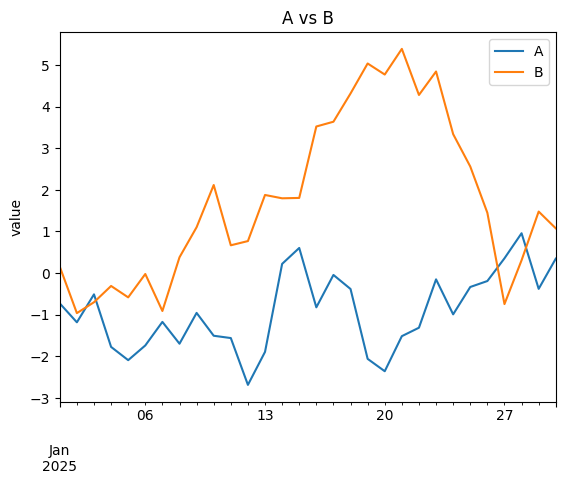

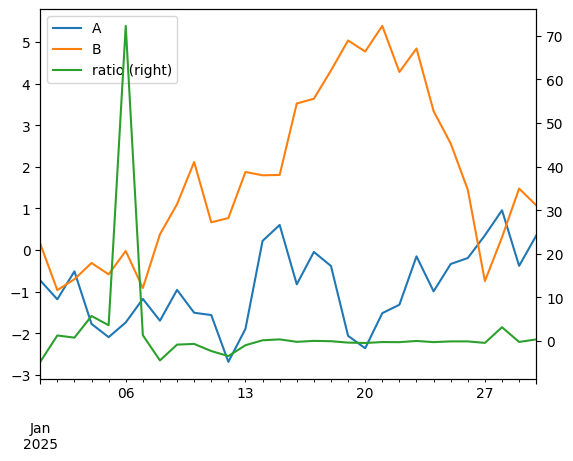

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 샘플 시계열 데이터 생성
dates = pd.date_range('2025-01-01', periods=30, freq='D')
df = pd.DataFrame({
    'A': np.random.randn(30).cumsum(),
    'B': np.random.randn(30).cumsum()
}, index=dates)

# 기본 라인 플롯
ax = df.plot(title='A vs B', ylabel='value')
plt.show()

# 보조 축 예시
# A/B 비율을 계산하여 'ratio' 컬럼 추가 후, 'ratio'만 보조 y축에 그립니다.
ax2 = df.assign(ratio=lambda d: d['A']/d['B']).plot(y=['A', 'B', 'ratio'], secondary_y='ratio')
plt.show()



---

## 37. Styler로 리포팅 - 포맷/하이라이트/HTML

### 개념

- **`Styler`**: DataFrame에 조건부 서식이나 포맷팅을 적용하여 시각적으로 풍부한 HTML 테이블로 표현하는 객체입니다. `df.style`로 접근합니다.
- **리포팅 품질 향상**: 숫자/날짜 포맷 지정, 배경 그라디언트, 최대/최소값 강조 등 다양한 스타일링을 통해 리포팅의 품질을 높일 수 있습니다.
- **내보내기**: 웹이나 Jupyter Notebook 환경에서 바로 미리보기가 가능하며, `to_html()` 메서드를 사용하여 파일로 내보낼 수 있습니다.

### 핵심 내용

- **일관된 포맷 관리**: `format()` 메서드를 사용하여 숫자나 날짜의 표시 형식을 일관되게 관리합니다. (예: `"{:, .0f}"`는 천 단위 콤마, `"{:+ .1%}"`는 부호와 소수점 첫째 자리 백분율)
- **빠른 인사이트**: `background_gradient` (배경색), `bar` (데이터 바) 등은 값의 크기를 시각적으로 빠르게 파악하는 데 도움을 줍니다. 단, 과도한 색 사용은 자제해야 합니다.
- **원본과 분리**: Styler 객체는 표시용(display)이므로, 계산에 사용되는 원본 DataFrame과 분리하여 사용해야 합니다.

### 코드 예제



In [37]:
import pandas as pd
import numpy as np

# 리포팅용 데이터 생성
rep = pd.DataFrame({
    'city': ['Seoul', 'Busan', 'Incheon'],
    'rev': [123456.78, 98765.43, 54321.0],
    'growth': [0.12, -0.03, 0.08]
})

# Styler를 사용한 체이닝 방식의 서식 지정
st = (
    rep.style
    # format: rev는 천 단위 콤마, growth는 부호가 있는 백분율로 포맷
    .format({'rev': '{:,.0f}', 'growth': '{:+.1%}'})
    # background_gradient: 'rev' 컬럼에 값의 크기에 따라 녹색 계열 그라디언트 적용
    .background_gradient(subset=['rev'], cmap='Greens')
    # highlight_max: 'growth' 컬럼의 최대값을 특정 색으로 강조
    .highlight_max(subset=['growth'], color='#ffed99')
)

# HTML로 변환하여 저장 (Jupyter Notebook에서는 st만 입력해도 결과가 보임)
html = st.to_html()
# print(html) # 생성된 HTML 문자열 출력
st # Jupyter 환경에서 바로 확인

,city,rev,growth
0,Seoul,"123,457",+12.0%
1,Busan,"98,765",-3.0%
2,Incheon,"54,321",+8.0%




---

## 38. 파이프라인 패턴 - 로드→정제→파생→집계→리포트

### 개념

- **함수형 파이프라인**: 데이터 처리의 각 단계(로드, 정제, 파생변수 생성, 집계 등)를 독립적인 순수 함수(pure function)로 분리하고, `pipe` 메서드로 연결하여 전체 워크플로우를 구성합니다. 이는 코드의 **재현성**과 **테스트 용이성**을 크게 향상시킵니다.
- **계약(Contract) 기반 설계**: 각 함수(단계)의 입출력 스키마(데이터 타입, 결측 여부, 값의 범위 등)를 명확히 정의하고 문서화합니다.
- **환경 의존성 분리**: 파일 경로, 랜덤 시드, 타임존 등과 같이 환경에 의존적인 설정들은 파이프라인 초기에 변수로 고정하여 관리합니다.

### 핵심 내용

- **순수 함수 작성**: 각 단계는 가능한 한 부작용(side effect)이 없는 순수 함수로 작성하여 예측 가능성을 높입니다.
- **중간 산출물**: 복잡한 파이프라인의 경우, 각 주요 단계의 결과를 Parquet 같은 효율적인 포맷으로 저장해두면 디버깅과 재실행이 용이합니다.

### 코드 예제



In [38]:
import pandas as pd

# 각 단계를 함수로 정의
def load(path):
    return pd.read_csv(path, parse_dates=['dt'])

def clean(df):
    return (
        df
        .dropna(subset=['y'])
        .assign(cat=lambda d: d['cat'].str.strip().str.upper())
    )

def feature(df):
    return df.assign(y_ma=df['y'].rolling(7, min_periods=1).mean())

def agg(df):
    return (
        df.groupby(df['dt'].dt.to_period('M'))
        .agg(y=('y', 'sum'), y_ma=('y_ma', 'mean'))
        .reset_index()
    )

# pipe를 사용하여 함수들을 연결한 파이프라인 실행
# (실제 'events.csv' 파일이 없으므로 실행 시 에러 발생)
# report = (
#     load('events.csv')
#     .pipe(clean)
#     .pipe(feature)
#     .pipe(agg)
# )
# print(report.head())



---

## 39. 트러블슈팅 - SettingWithCopy / 정렬·정합 / 타입

### 개념

- **`SettingWithCopyWarning`**: 체인 인덱싱(예: `df[...][...]`)을 사용하여 뷰(view)에 값을 쓰려고 할 때 발생하는 경고입니다. 이는 Pandas가 해당 작업이 원본의 복사본에 일어나는지, 원본 자체에 일어나는지 보장할 수 없음을 의미하며, 예기치 않은 비동기 갱신을 유발할 수 있습니다.
- **정렬/정합 문제**: 조인이나 재색인 후 `NaN` 값이 생기거나 순서가 꼬이는 문제는 대부분 인덱스의 타입, 정렬 상태, 중복 여부에서 기인합니다.
- **타입/타임존 함정**: `object`나 문자열로 저장된 날짜, 여러 타임존이 혼합된 데이터, DST(서머타임) 등은 시계열 분석에서 흔히 발생하는 문제입니다.

### 핵심 내용

- **`SettingWithCopyWarning` 해결**: 항상 `.loc[row_mask, col]`를 사용하여 단일 단계로 값을 수정하고, 데이터의 일부를 분리하여 작업할 때는 `.copy()`를 명시적으로 사용하여 의도를 명확히 해야 합니다.
- **조인 전후 검증**: 조인 전후에 `len()`, `value_counts()`, 키의 유일성(`is_unique`), `validate` 옵션 등을 활용하여 데이터의 크기와 무결성을 반드시 검증해야 합니다.
- **타입 표준화**: 날짜 데이터는 발견 즉시 `to_datetime`으로 변환하고, 타임존 데이터는 일괄적으로 UTC로 표준화한 뒤, 표시할 때만 지역 시간으로 변환하는 것이 안전합니다.

### 코드 예제



In [39]:
import pandas as pd

base = pd.DataFrame({'x':[1,2,3,4], 'y':[10,20,30,40]})

# 잠재적인 뷰(view) 생성
view = base[base['x'] >= 2]

# 잘못된 예: view에 직접 값을 할당하려 하면 SettingWithCopyWarning 발생 가능
# view['y'] = view['y'] + 1

# 안전한 방법 1: .copy()를 사용하여 명시적으로 복사본 생성
safe = base.loc[base['x'] >= 2, :].copy()
safe['y'] = safe['y'] + 1

# 안전한 방법 2: .loc를 사용하여 원본에 직접 수정
base.loc[base['x'] >= 2, 'y'] = base.loc[base['x'] >= 2, 'y'] + 1
print("--- 안전하게 수정된 결과 ---")
print(base)

--- 안전하게 수정된 결과 ---
   x   y
0  1  10
1  2  21
2  3  31
3  4  41




---

## 40. 마무리 & 체크리스트 - 품질·성능·재현성

### 개념

- **신뢰성 (품질)**: 분석 결과의 신뢰성은 **스키마 검증, 결측치 처리 정책, 테스트 데이터**를 통해 담보됩니다. `assert` 문을 활용하여 데이터의 핵심 가정을 코드 레벨에서 검증할 수 있습니다.
- **성능**: **벡터화, 캐시, 적절한 파일 포맷 선택**으로 성능을 확보합니다.
- **재현성 (Reproducibility)**: **파이프라인화, 고정된 랜덤 시드(seed)**를 통해 누가 언제 실행해도 동일한 결과를 얻을 수 있도록 보장합니다.
- **다음 단계**: Pandas에 익숙해졌다면, 더 큰 규모의 데이터를 다루기 위해 `Arrow`, `Polars`나 `Dask`, `Spark` 같은 분산 처리 프레임워크로 확장하는 것을 고려해볼 수 있습니다.

### 핵심 내용

- **입력 검증**: 데이터 로딩 후 타입, 범위, 유일성, 참조 무결성 등을 검증합니다.
- **출력 검증**: 최종 결과물의 지표 합계, 분포, 변동폭 등이 사전에 기대했던 범위와 일치하는지 확인합니다.
- **실험 노트**: 분석 환경(패키지 버전, 시드 값 등)을 기록하여 나중에 누구라도 동일한 환경에서 결과를 재현할 수 있게 합니다.

### 코드 예제



In [40]:
import pandas as pd

# 데이터 유효성 검증 함수 예시
def validate(df):
    # 'id' 컬럼은 유일해야 함
    assert df['id'].is_unique, '중복 id 존재'
    # 'y' 컬럼은 0과 1,000,000 사이거나 NaN이어야 함
    assert (df['y'].between(0, 1_000_000) | df['y'].isna()).all(), 'y 범위 초과'
    # 'dt' 컬럼은 datetime 타입이어야 함
    assert pd.api.types.is_datetime64_any_dtype(df['dt']), 'dt는 datetime이어야 함'
    return True

# 사용 예시
# loaded_df = pd.read_csv(...)
# validate(loaded_df)